In [113]:
import pandas as pd
import numpy as np

In [114]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager
mpl.rcParams.update(mpl.rcParamsDefault)

# import warnings
# warnings.filterwarnings("ignore")

divs = lambda x, y: np.divide(np.array([x], dtype=float), np.array([y], dtype=float), out=np.full_like(np.array([x], dtype=float), np.nan), where=np.array([y], dtype=float)!=0)


In [115]:
mss=50
fontssize=50
mpl.rcParams.update({
    'figure.figsize': (23.6,12.6),
    'font.family': 'serif',
    'font.serif': ['Liberation Sans'],  # Add or remove font names as needed
    'font.size': fontssize,  # Adjust as needed
    #'font.weight': 'bold',
    "svg.fonttype": 'none',
    'text.usetex': False,
    'axes.linewidth' : 2,
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{cmbright}',
    'xtick.labelsize' : fontssize, # fontsize of the x tick labels
    'ytick.labelsize' : fontssize # fontsize of the y tick labels
})
ticks_font = font_manager.FontProperties(family='Liberation Sans', style='normal',
    size=fontssize, weight='bold', stretch='normal')

In [116]:
# Activate for all recording plots
rats=[20382,24101,21012,22295,20630,22098,23783,24116]
path="../data_bool/"
df = pd.DataFrame()

for ratid in rats:
    tmp_df=pd.read_json(path+"Rat_"+str(ratid)+"_BOOLop_resrel_data.json")
    df = pd.concat([df,tmp_df], ignore_index=True)
df = df.fillna(0)

In [117]:
# # Activate for Single recording plots
# rats=[20382,24101,21012,22295,20630,22098,23783,24116]
# path="../data_bool/"
 
# rat=21012
# df=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_resrel_data.json")
# df = df.fillna(0)
# #rec_gids=df.Rec_GID.unique()

# rgid=3378

In [118]:
df_AND=df.query('OP == "AND"')
df_OR=df.query('OP == "OR"')
df_XOR=df.iloc[df.query('OP == "OR"').index + 1 ] ##For XOR, the next row is the result
assert np.array_equal(df_OR.U1_GID.values,df_XOR.U1_GID.values)
assert np.array_equal(df_OR.U2_GID.values,df_XOR.U2_GID.values)

Skip to the section for plots which are not the part of the manuscript

## MSR -- Individual Figures of the subplot for all recordings combined

In [119]:
quant='MSR'

#qmin=0.245;qmax=0.305; #For MSR
qmin=0.245;qmax=0.31; #For MSR

#MSR
#xqmax=0.31;xqmin=0.25;
yqmax=0.32;yqmin=-0.01;


## Single recording
# qmin=0.245;qmax=0.305; #For MSR

# #MSR
# xqmax=0.31;xqmin=0.25;
# yqmax=0.32;yqmin=-0.02;



In [120]:


quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

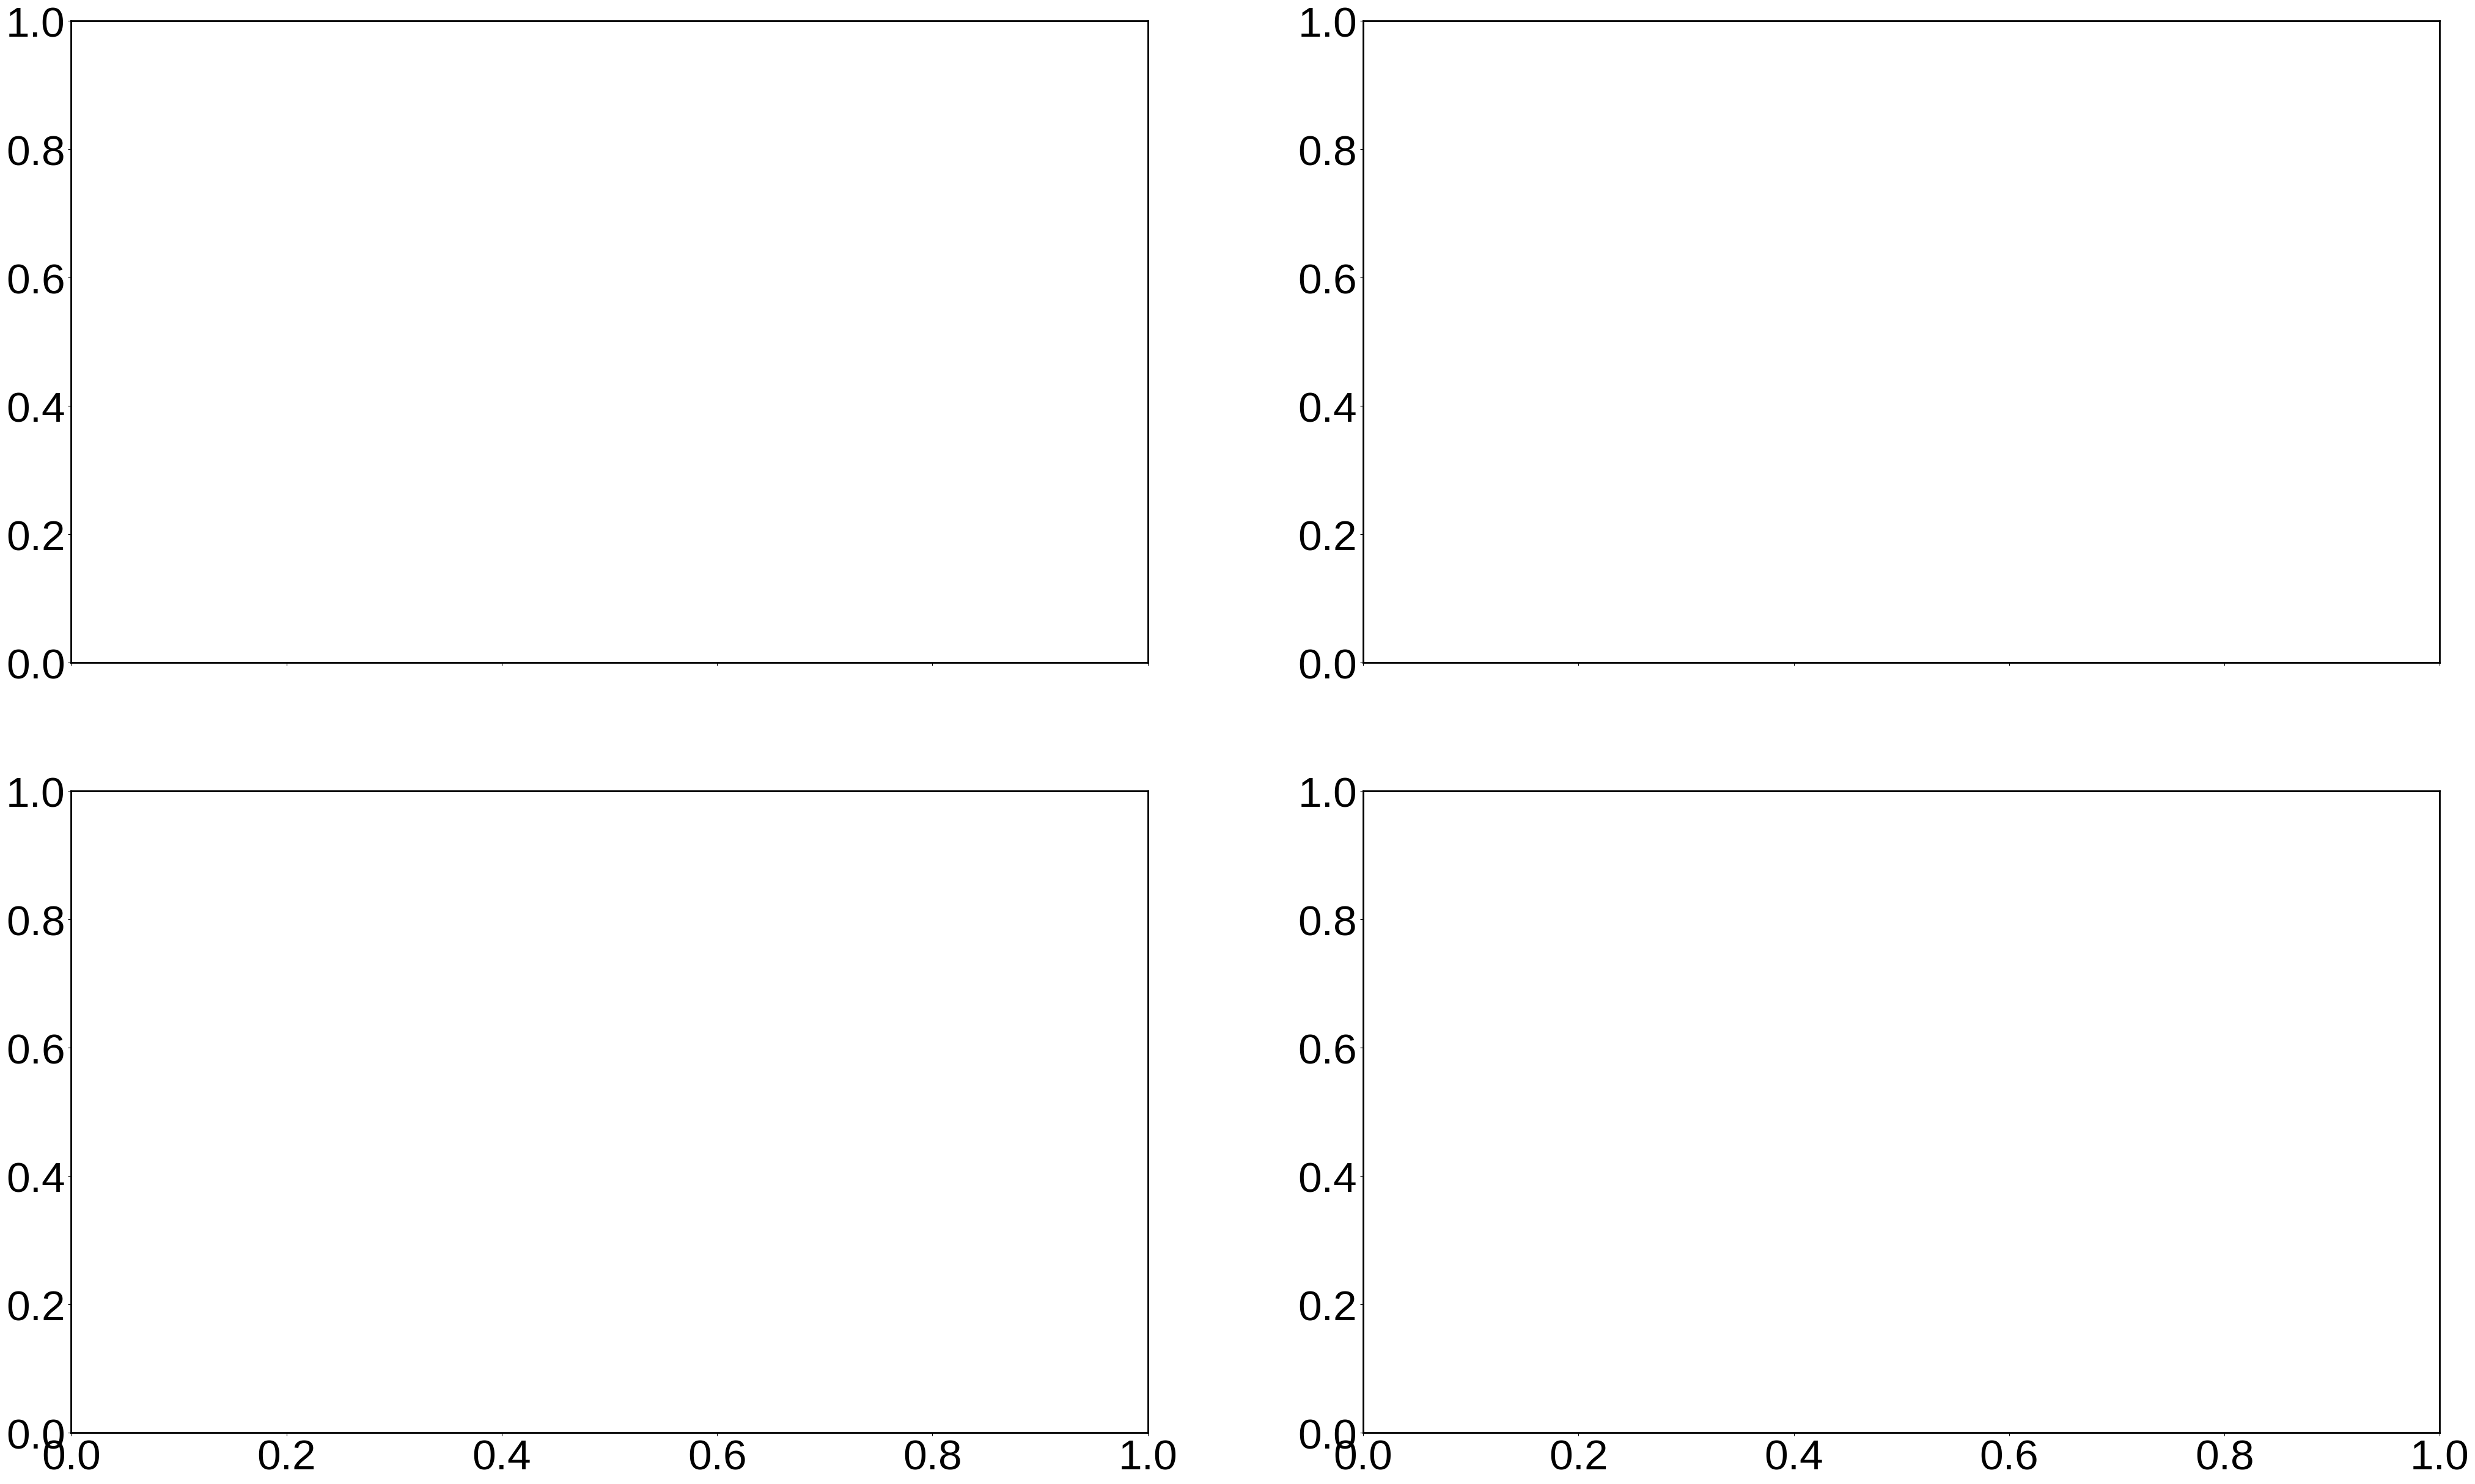

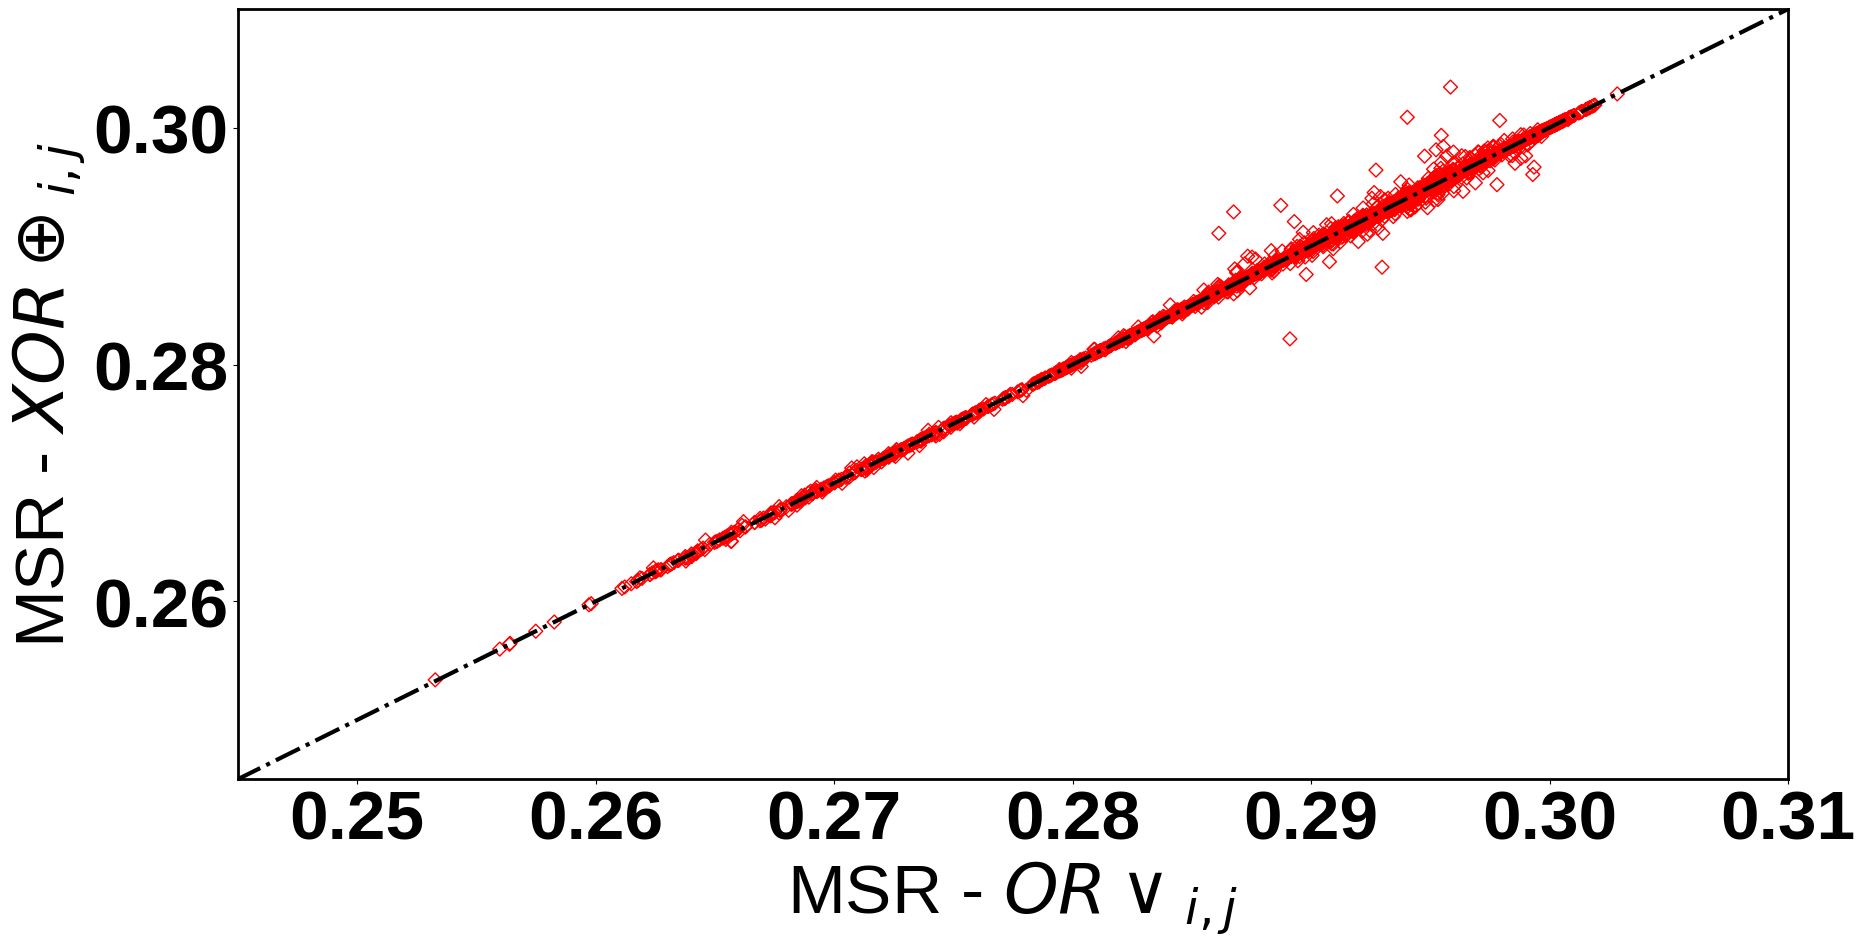

In [121]:
fig, ax1 = plt.subplots(figsize=(20,10))
figname='../figures/CA1_MSR_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

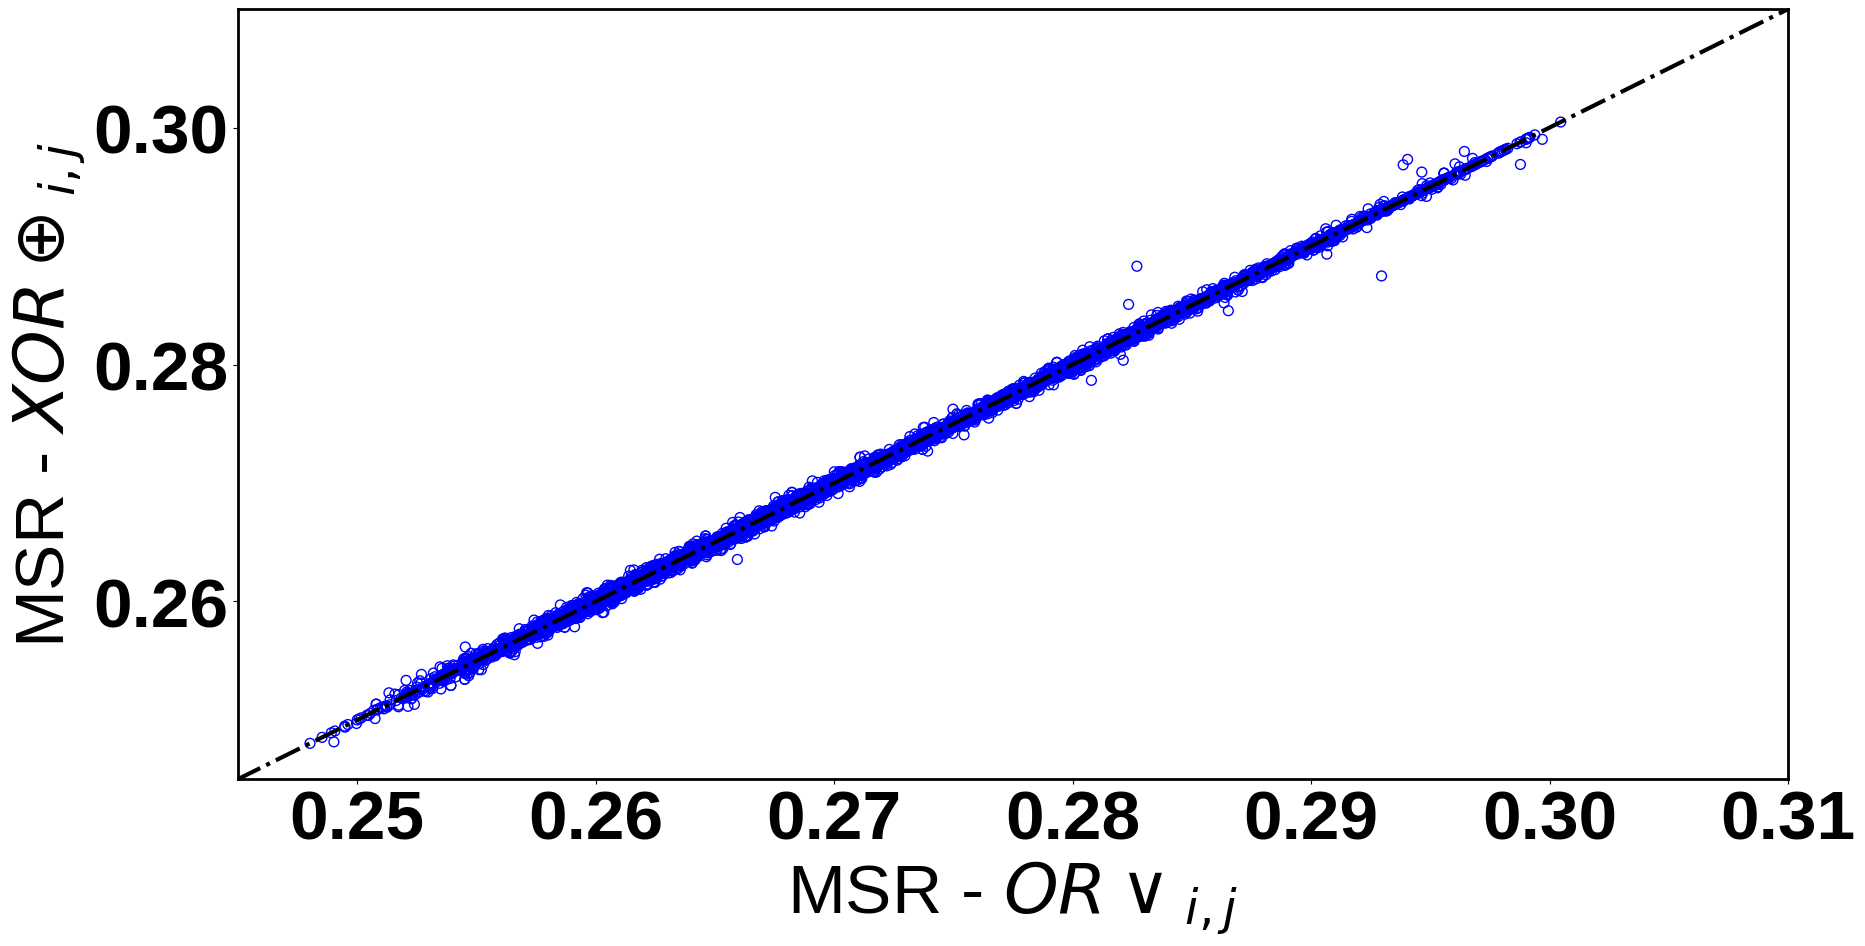

In [122]:
fig, ax1 = plt.subplots(figsize=(20,10))
figname='../figures/SUB_MSR_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

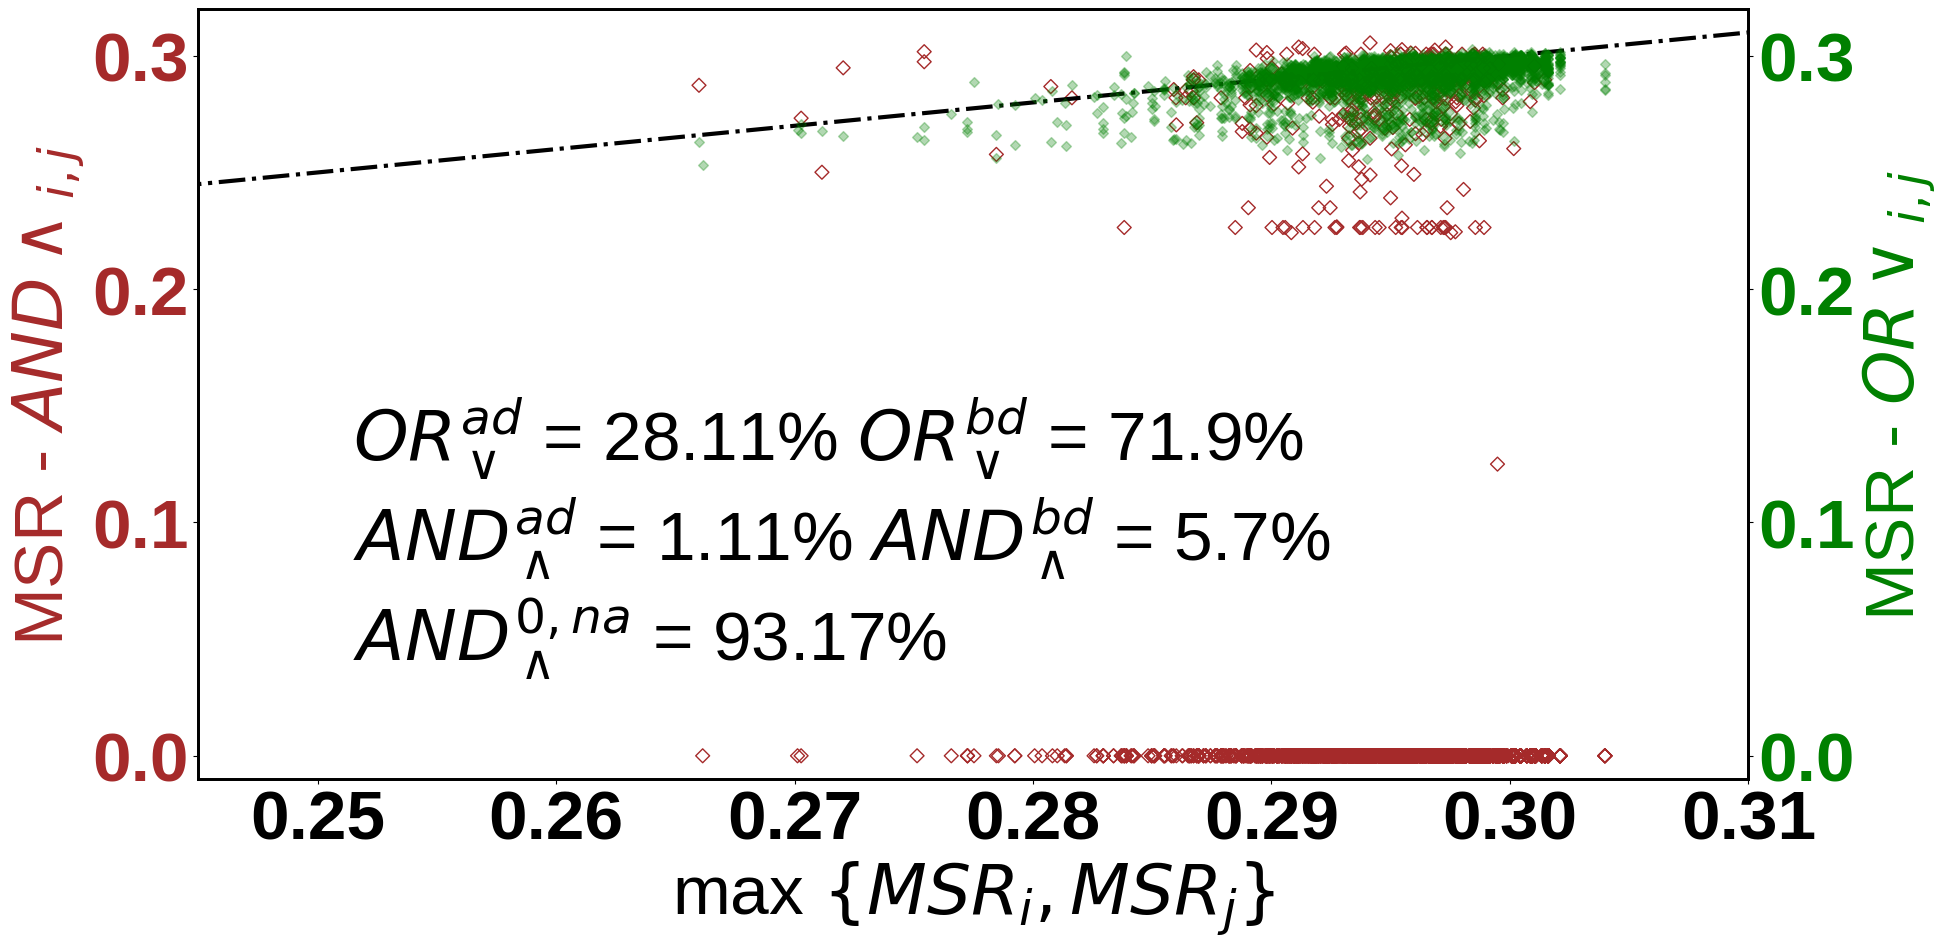

In [123]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/CA1_MSR_maxMvANDOR.pdf'


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');

ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)
ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'
for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D', color=clr,s=mss/2,alpha=0.3)
ax_twin.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 

fracC_ad_or=list_of_OR.query('loc=="CA1" and MSR>R_MSR_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="CA1" and MSR<R_MSR_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="CA1" and 0<MSR<R_MSR_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="CA1" and MSR>R_MSR_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_zero=list_of_AND.query('loc=="CA1" and MSR==0').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]


ax.text(0.1, 0.5,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
        r'$AND^{0,na}_\wedge$ = %.2f%%'% (100*fracC_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

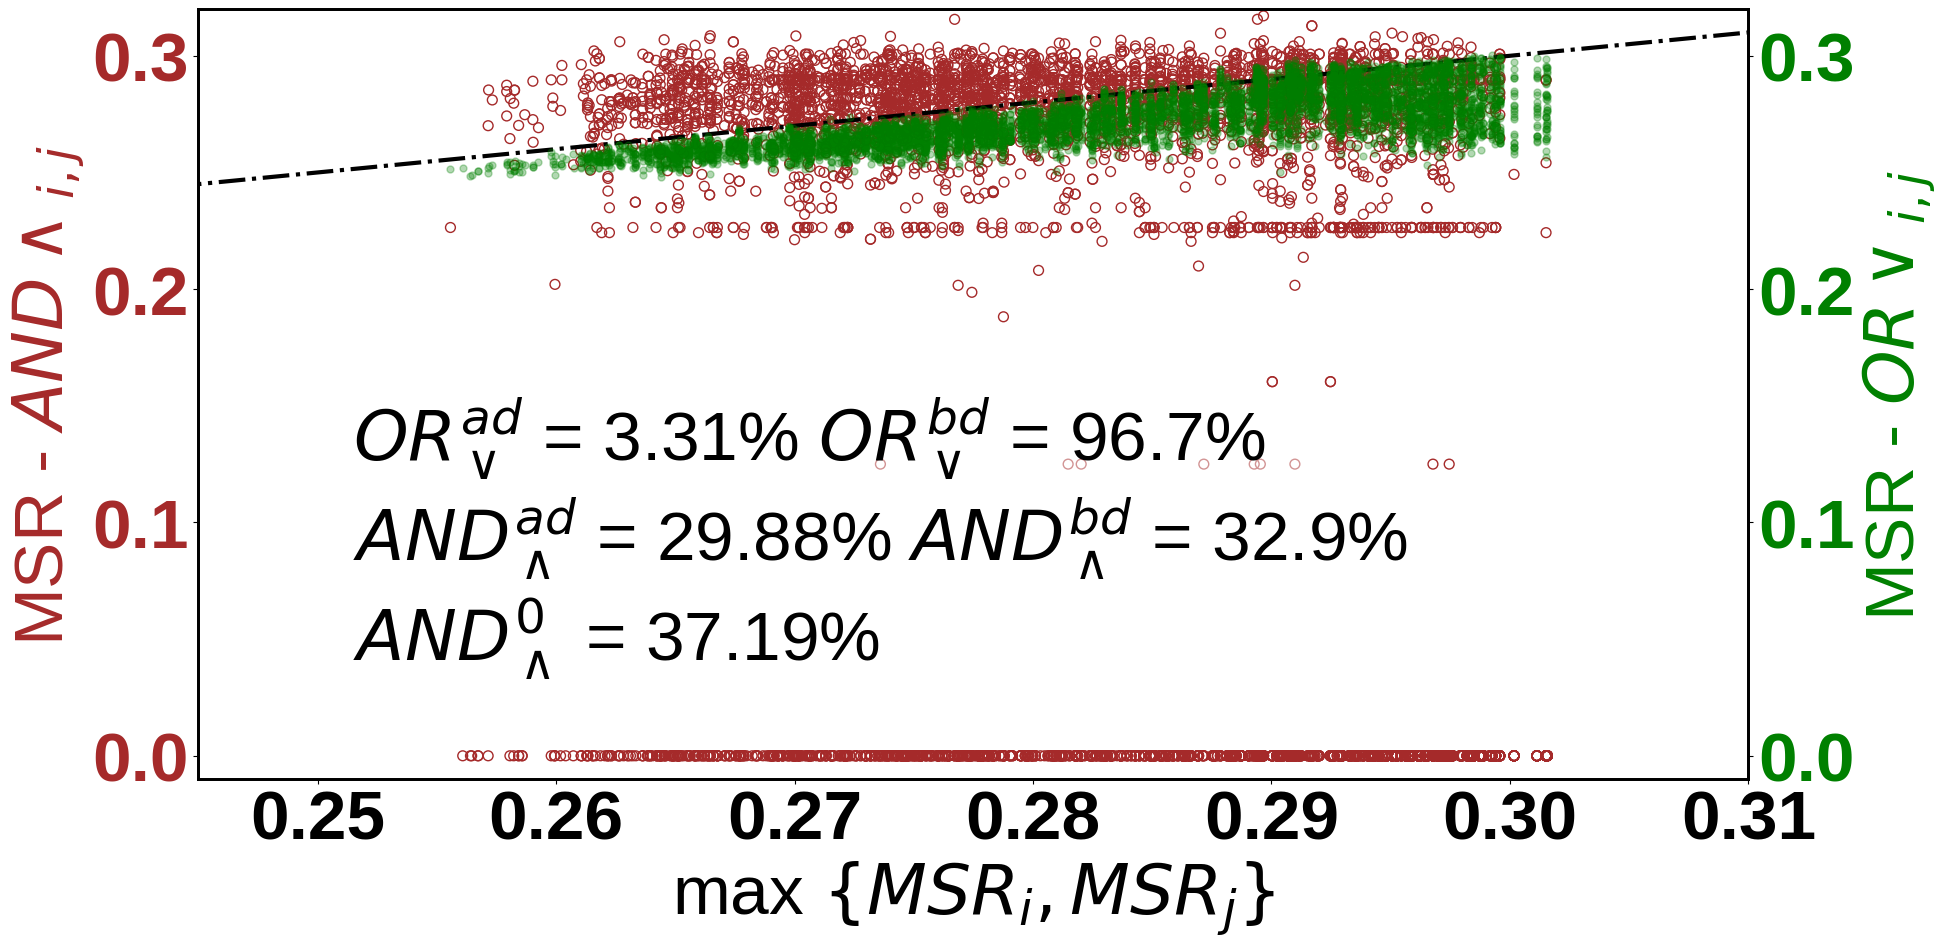

In [124]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/SUB_MSR_maxMvANDOR.pdf'

ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');


ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='o', facecolors='none',edgecolors=clr,s=mss)
ax.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o',color=clr,s=mss/2,alpha=0.3)
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.set_ylabel(quant+r' - $OR\vee_{i,j}$');
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="SUB" and MSR>R_MSR_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="SUB" and MSR<R_MSR_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="SUB" and 0<MSR<R_MSR_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="SUB" and MSR>R_MSR_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_zero=list_of_AND.query('loc=="SUB" and MSR==0').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]


ax.text(0.1, 0.5,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
        r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))


fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

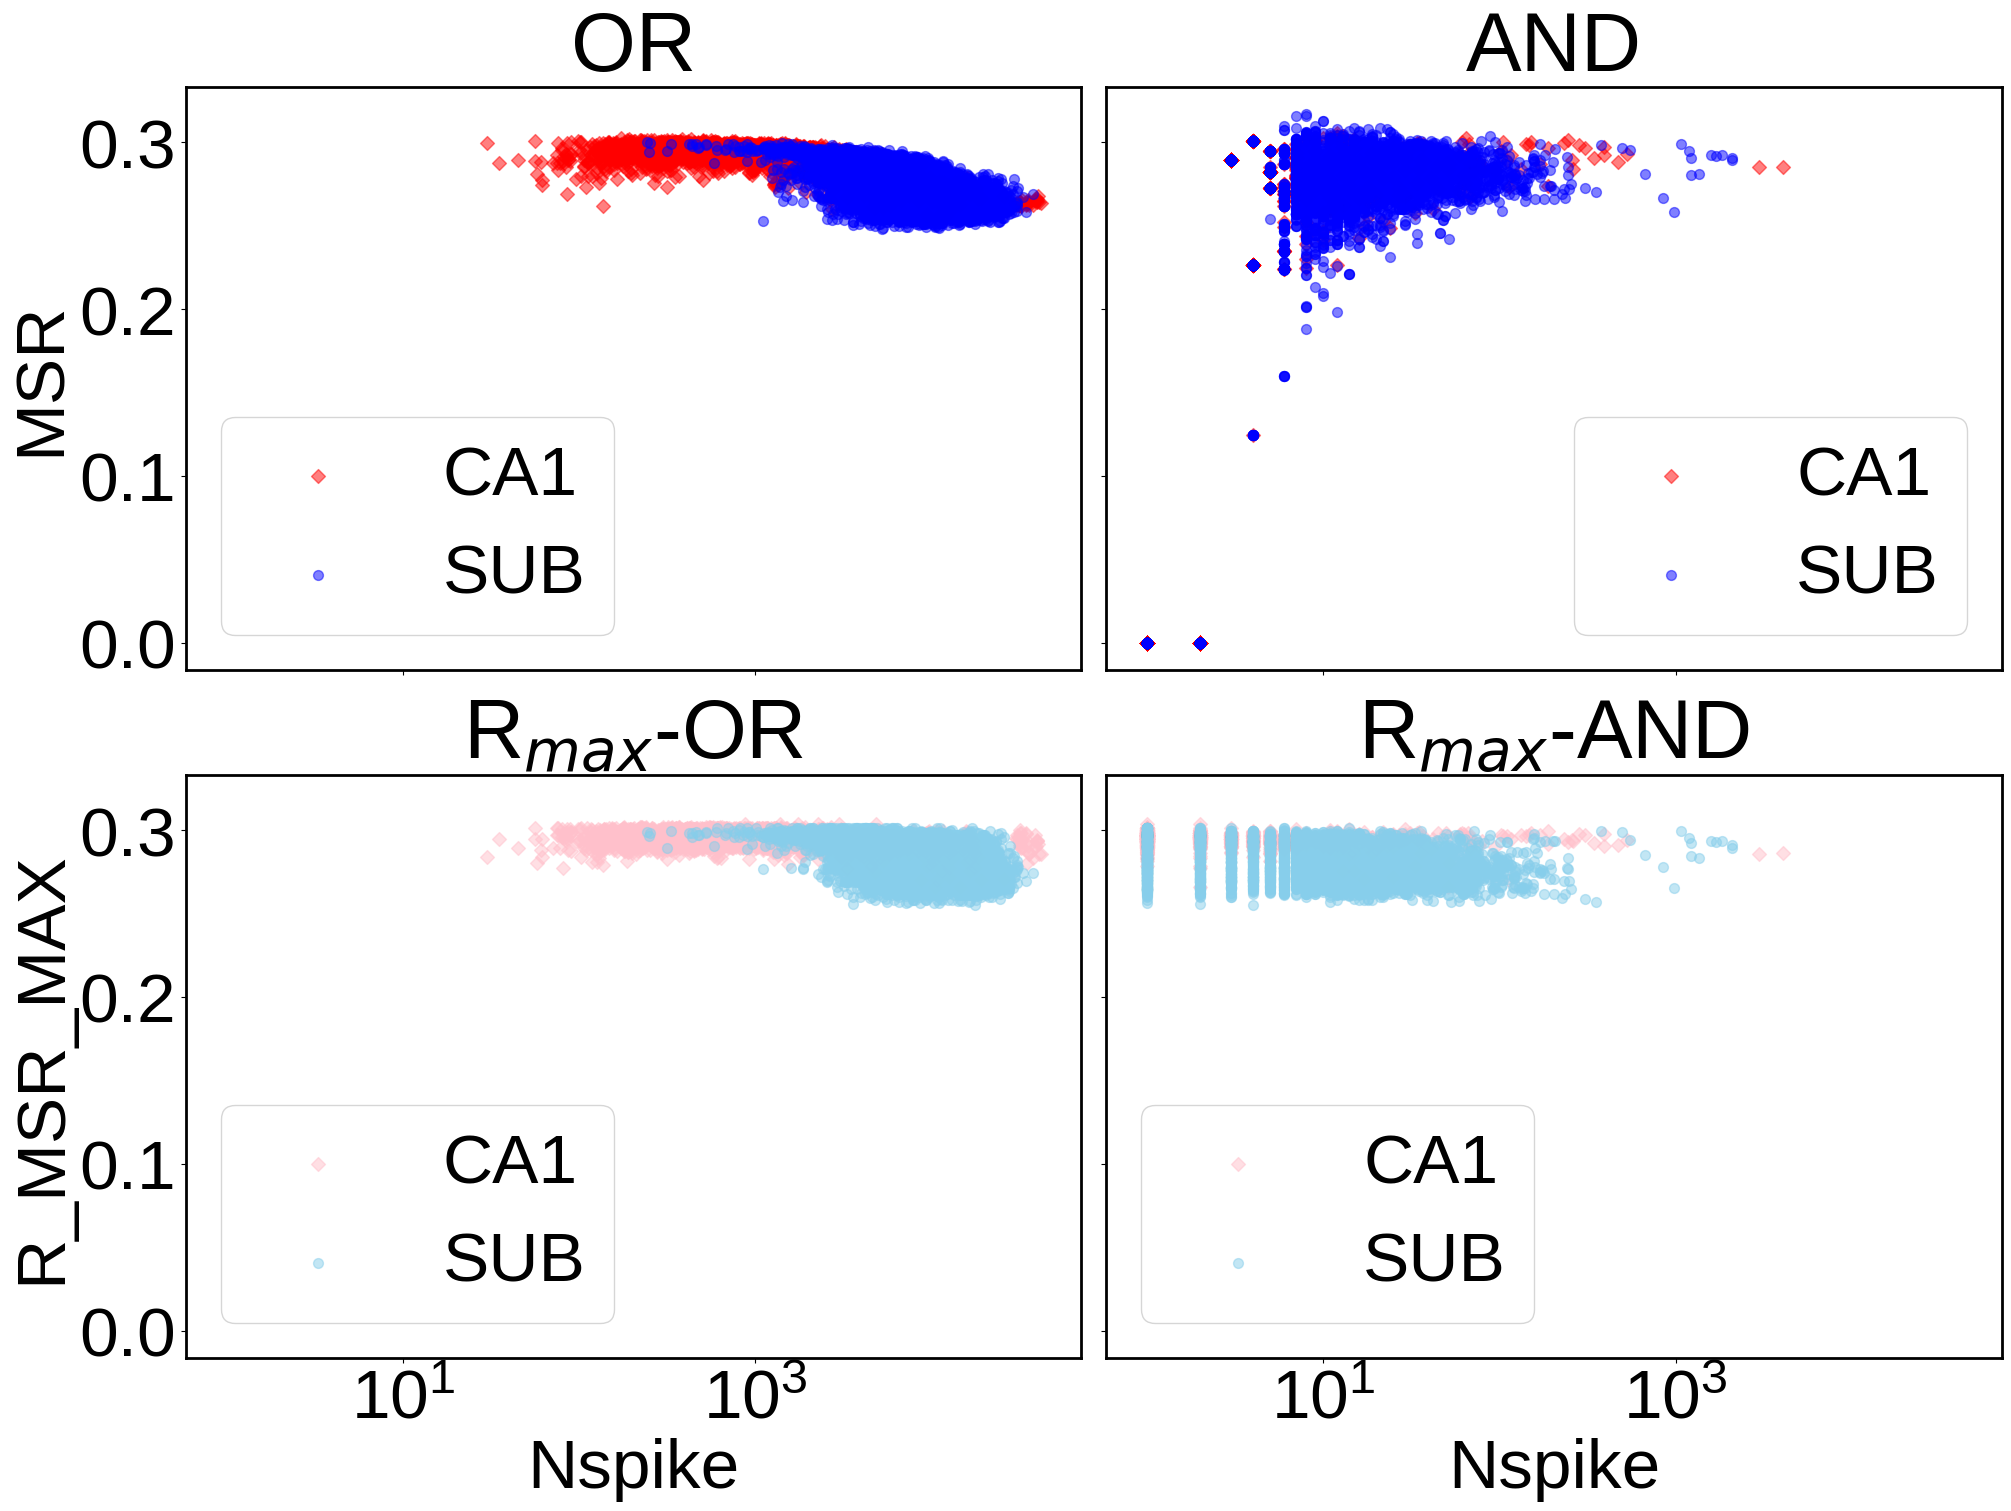

In [125]:
figname='../figures/MSR_LoPvNspike.pdf'

f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,15),constrained_layout=True) 

list_of_OR.query('loc=="CA1"').plot(y='MSR',x='Nspike',kind='scatter',ax=ax1,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='MSR',x='Nspike',kind='scatter',ax=ax1,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax1.set_xscale('log')
ax1.set_title('OR')

list_of_OR.query('loc=="CA1"').plot(y='R_MSR_MAX',x='Nspike',kind='scatter',ax=ax3,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='R_MSR_MAX',x='Nspike',kind='scatter',ax=ax3,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax3.set_xscale('log')
ax3.set_title(r'R$_{max}$-OR')


list_of_AND.query('loc=="CA1"').plot(y='MSR',x='Nspike',kind='scatter',ax=ax2,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='MSR',x='Nspike',kind='scatter',ax=ax2,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax2.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax2.set_title('AND')

list_of_AND.query('loc=="CA1"').plot(y='R_MSR_MAX',x='Nspike',kind='scatter',ax=ax4,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='R_MSR_MAX',x='Nspike',kind='scatter',ax=ax4,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax4.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax4.set_title(r'R$_{max}$-AND')
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

## OHK -- Individual Figures of the subplot for all recordings combined

In [126]:
quant='OHK'

#For OHK
qmin=0.1;qmax=0.6; 

##OHK
#xqmax=0.6;xqmin=0.1;
yqmax=0.6;yqmin=-0.05;

## Single recording
# #qmin=0.1;qmax=0.5;  #For OHK

# #OHK
# # xqmax=0.6;xqmin=0.1;
# # yqmax=0.6;yqmin=0.1;


In [127]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)



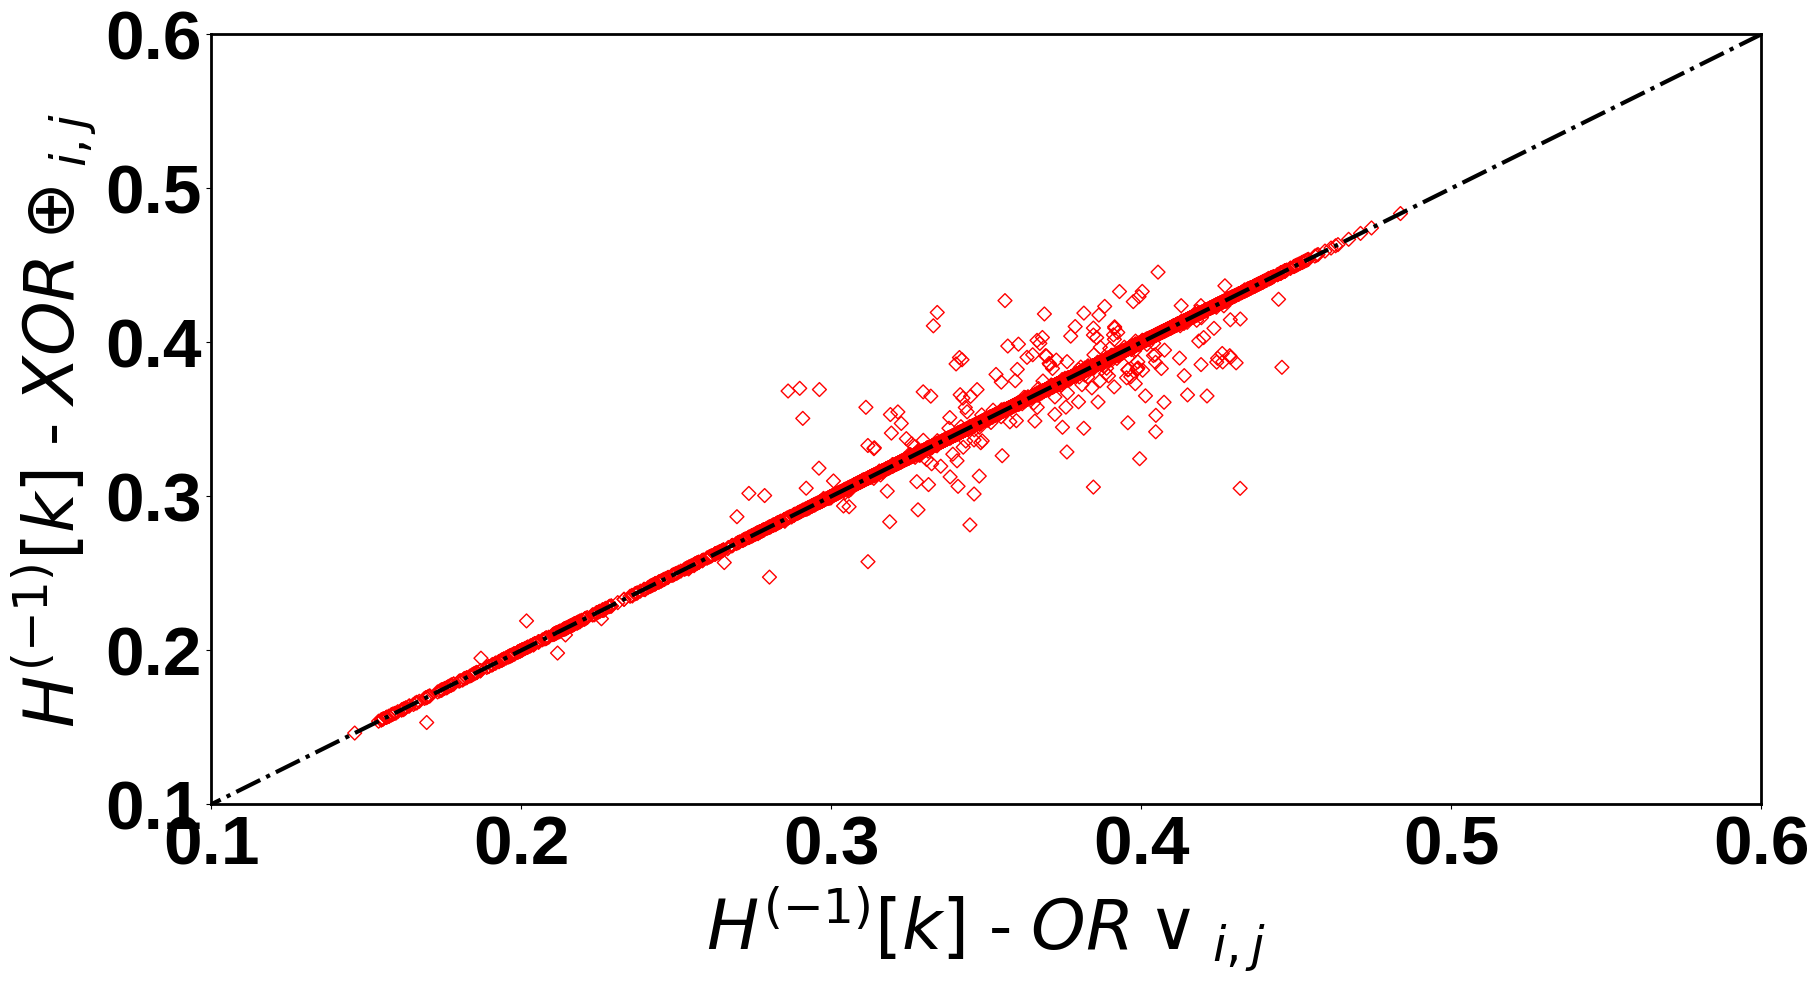

In [128]:
fig, ax1 = plt.subplots(figsize=(20,10))
figname='../figures/CA1_OHK_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[k]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

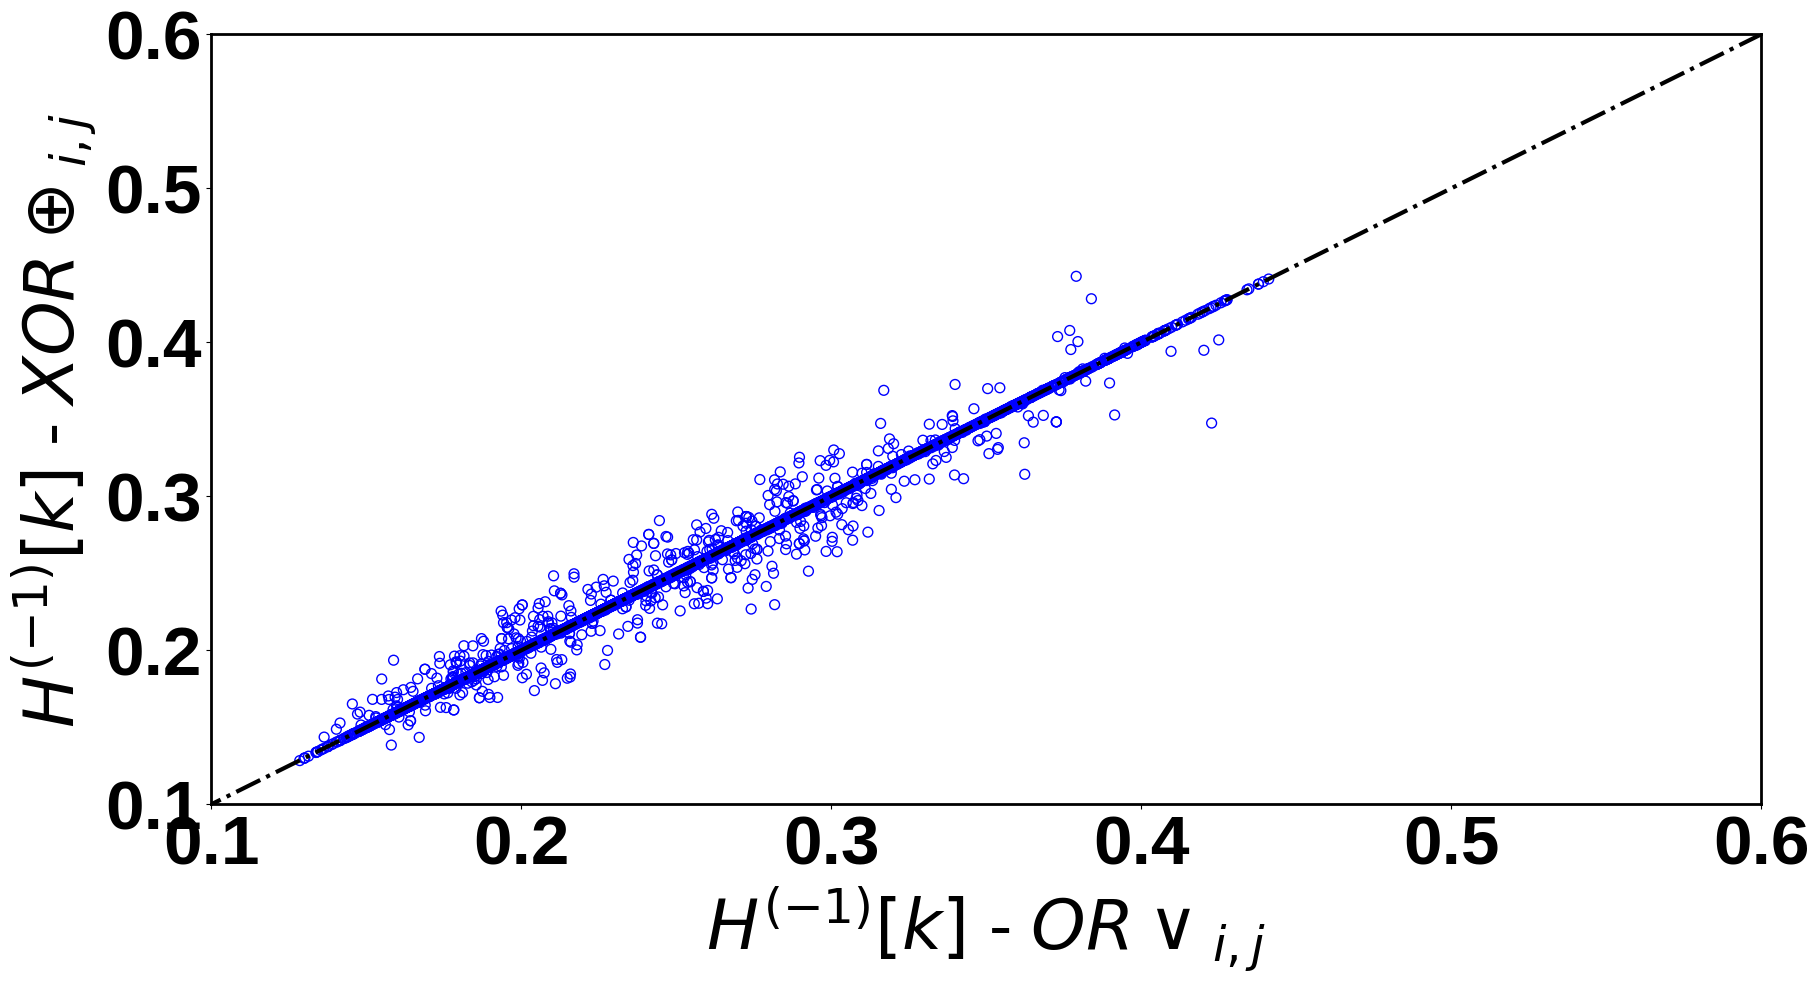

In [129]:
fig, ax1 = plt.subplots(figsize=(20,10))
figname='../figures/SUB_OHK_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[k]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

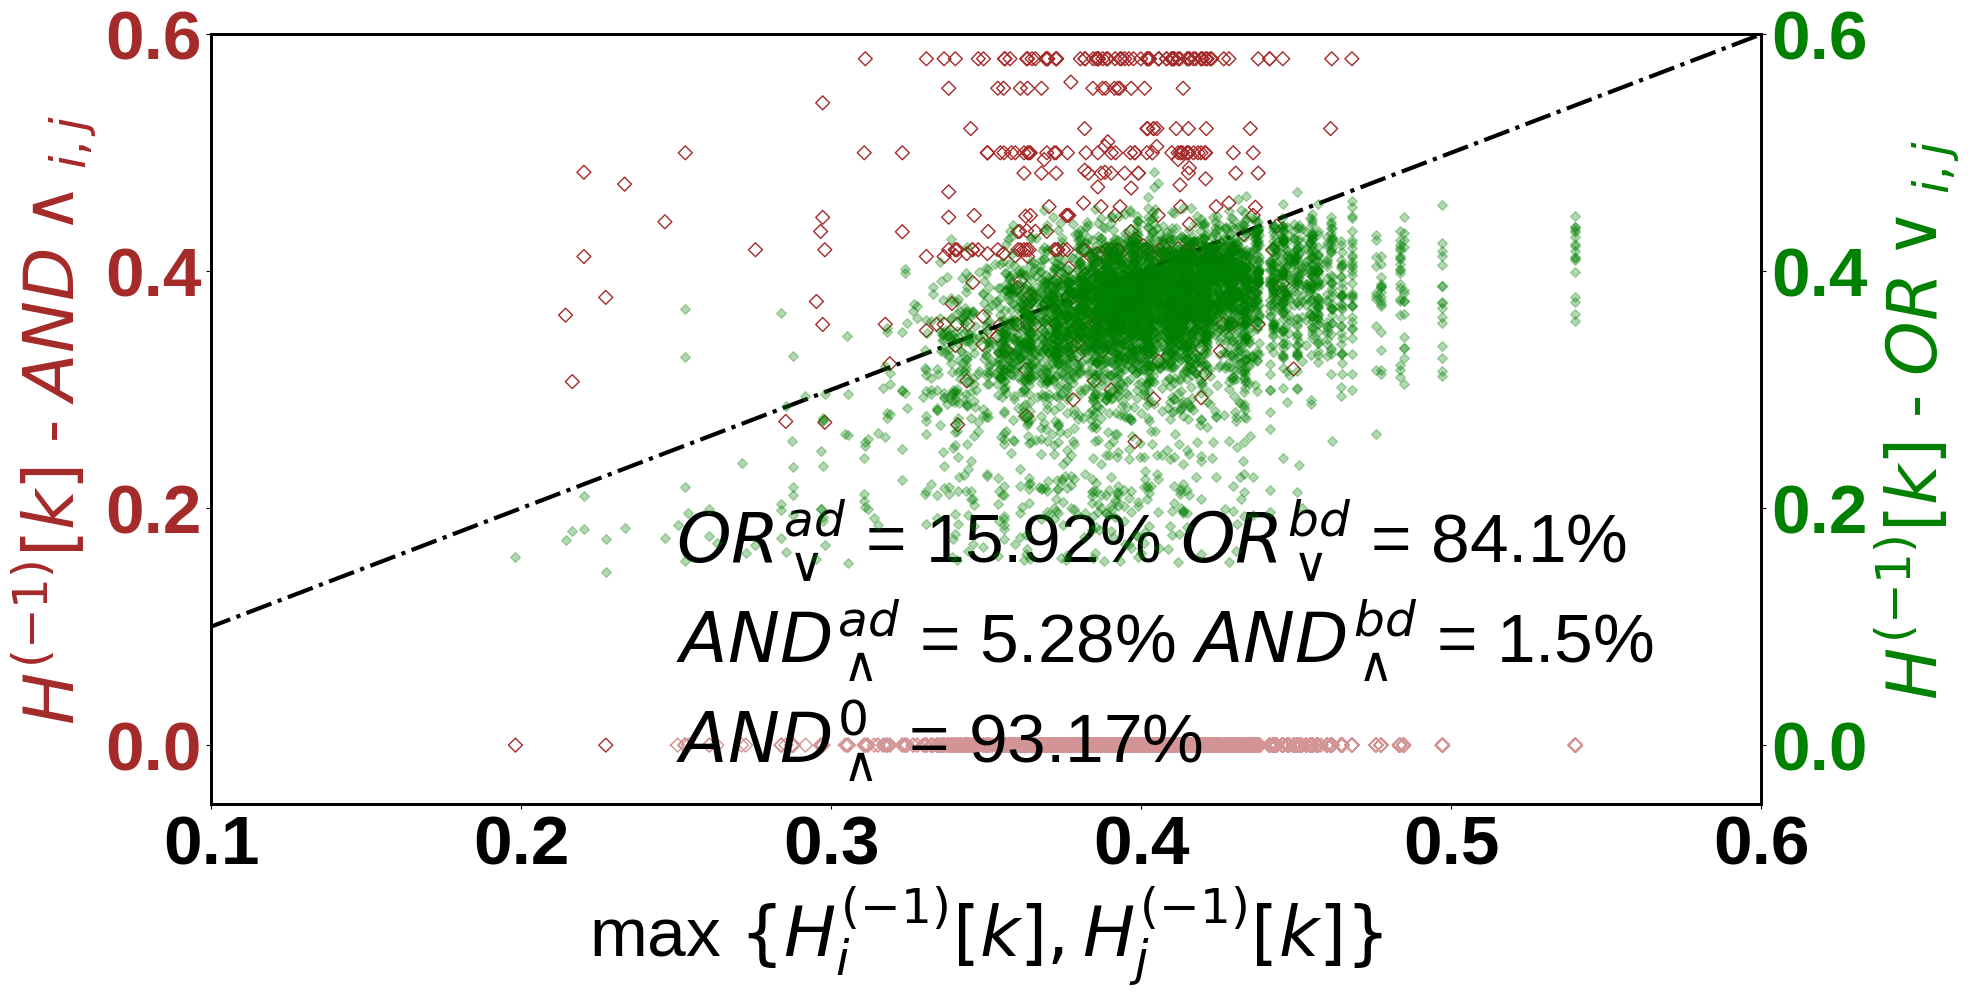

In [130]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/CA1_OHK_maxMvANDOR.pdf'


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.set_xlabel(r'max $\{ H^{(-1)}_i[k] , H^{(-1)}_j[k] \}$');


ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D',facecolors='none',edgecolors=clr,s=mss )
ax.set_ylabel(r'$H^{(-1)}[k]$ - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'



for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D',color=clr,s=mss/2,alpha=0.3)
ax_twin.set_ylabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');       
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="CA1" and OHK>R_OHK_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="CA1" and OHK<R_OHK_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="CA1" and 0<OHK<R_OHK_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="CA1" and OHK>R_OHK_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_zero=list_of_AND.query('loc=="CA1" and OHK==0').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]


ax.text(0.3, 0.4,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
        r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

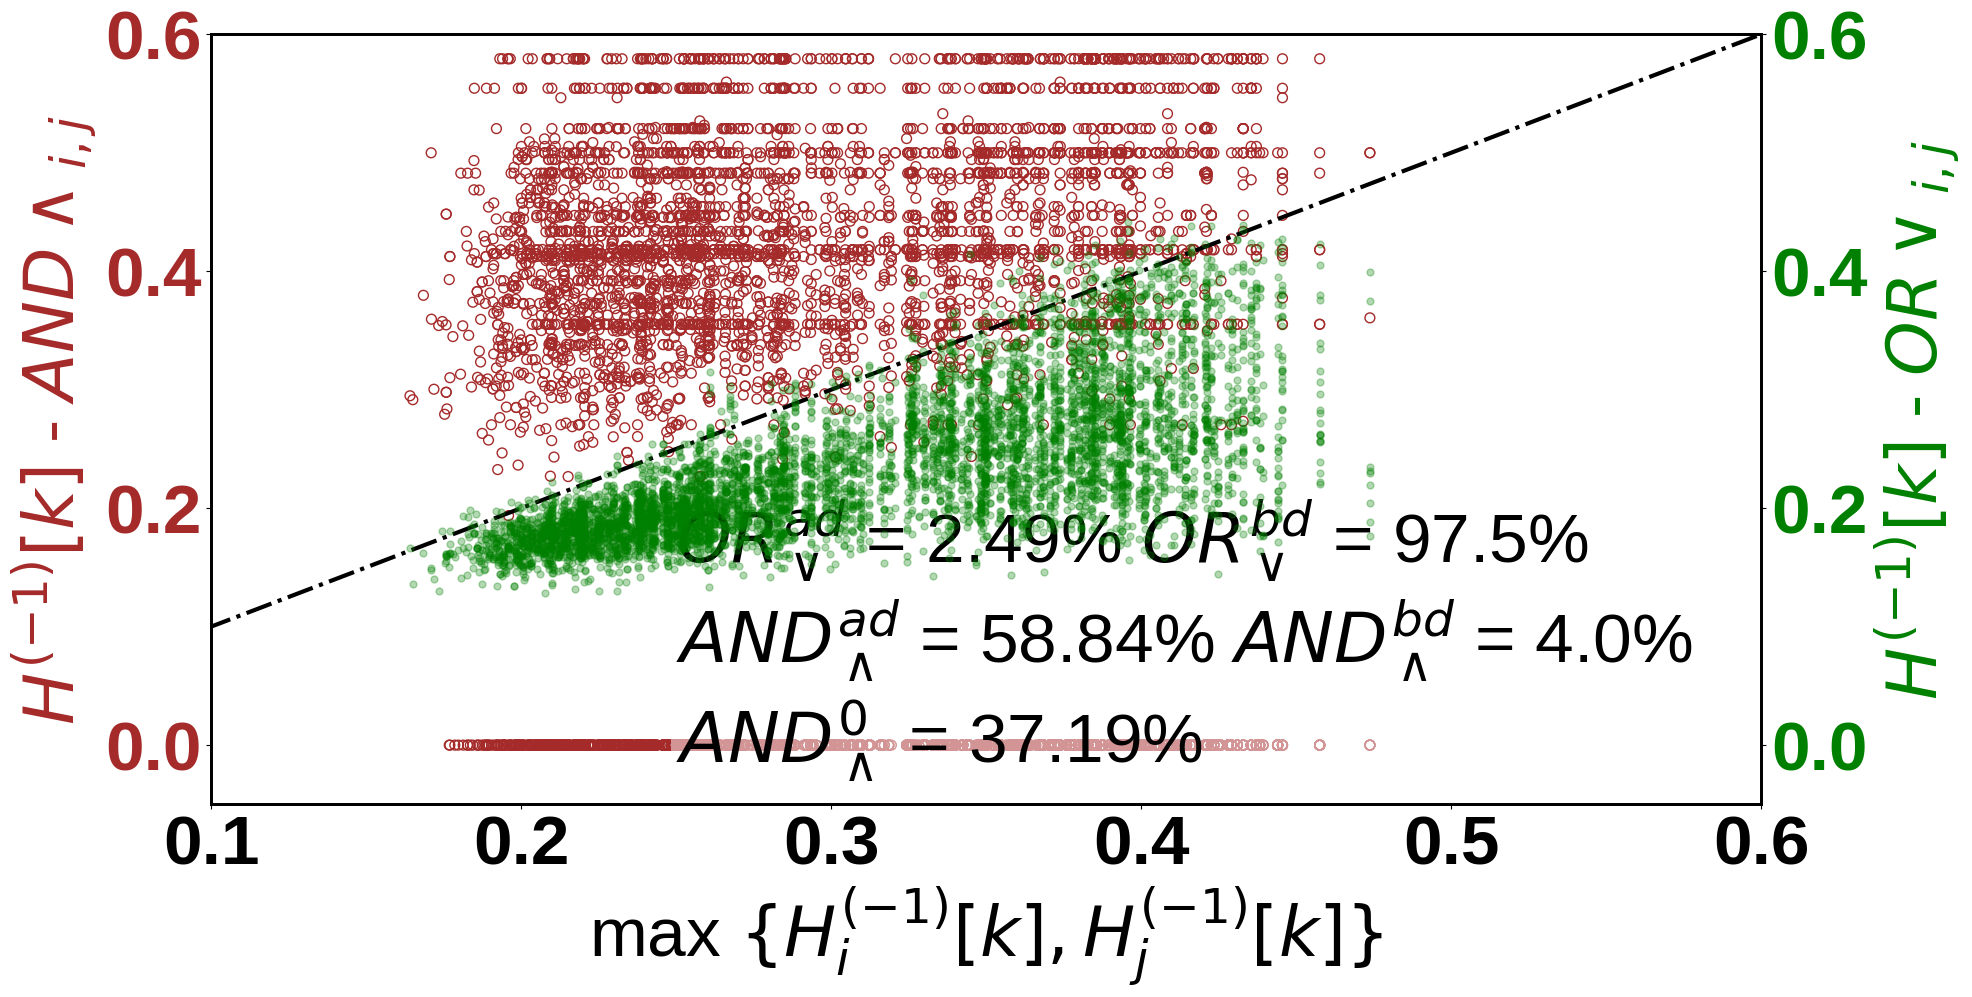

In [131]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/SUB_OHK_maxMvANDOR.pdf'

ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{ H^{(-1)}_i[k] , H^{(-1)}_j[k] \}$');


ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='o',facecolors='none',edgecolors=clr,s=mss)
ax.set_ylabel(r'$H^{(-1)}[k]$ - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o',color=clr,s=mss/2 ,alpha=0.3)
ax_twin.set_ylabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="SUB" and OHK>R_OHK_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="SUB" and OHK<R_OHK_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="SUB" and 0<OHK<R_OHK_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="SUB" and OHK>R_OHK_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_zero=list_of_AND.query('loc=="SUB" and OHK==0').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]


ax.text(0.3, 0.4,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
        r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

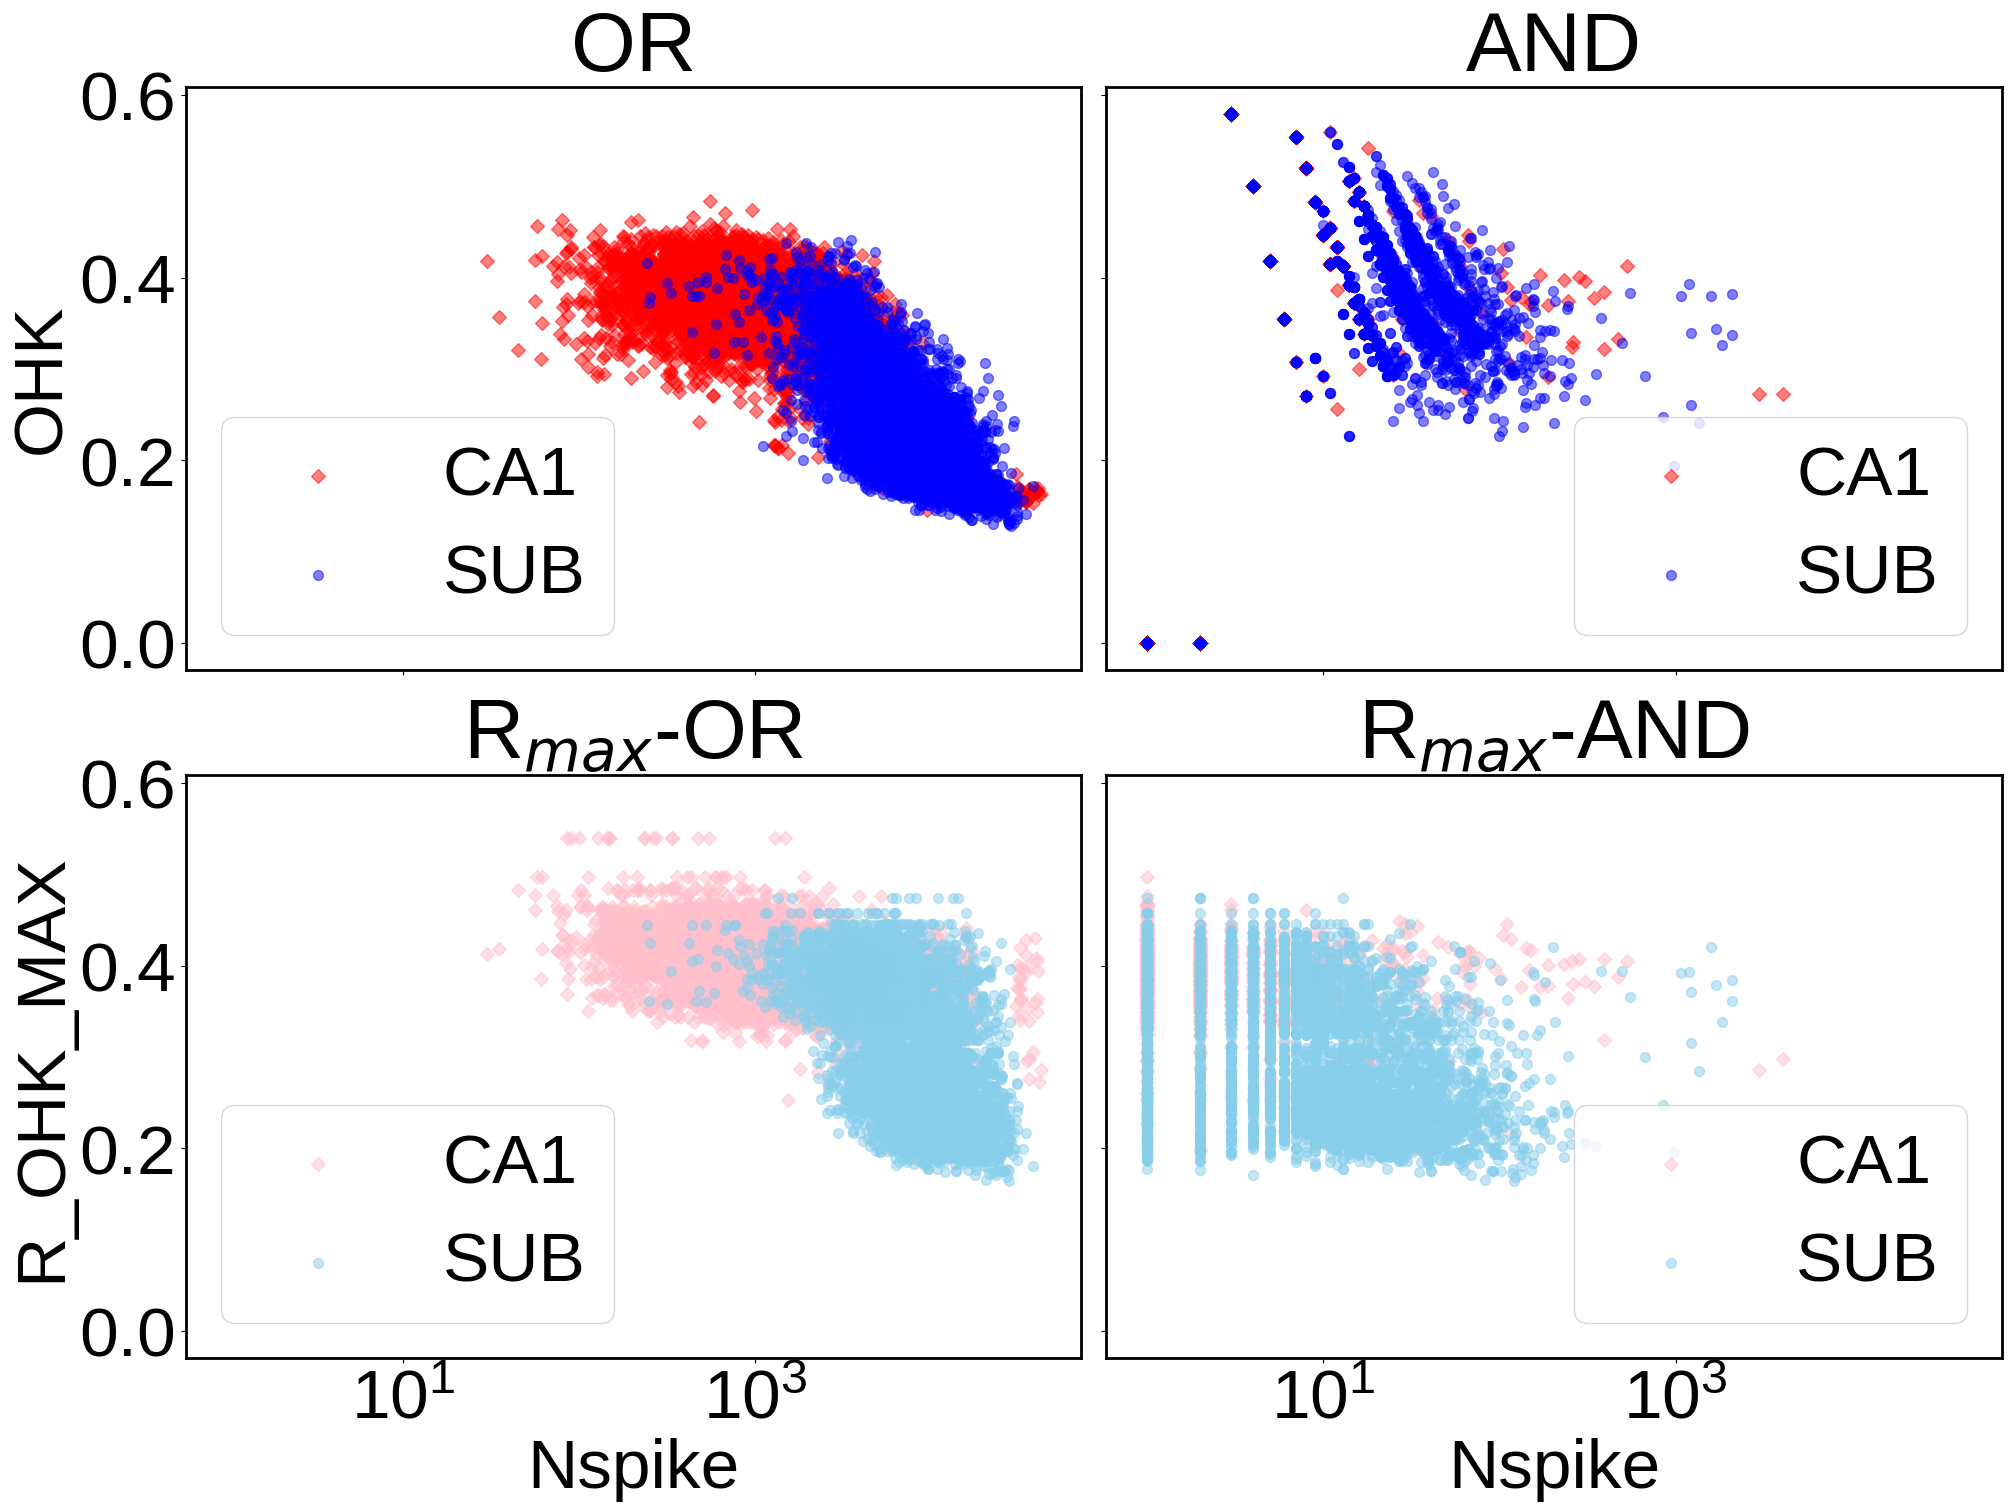

In [132]:
figname='../figures/OHK_LoPvNspike.pdf'

f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,15),constrained_layout=True) 

list_of_OR.query('loc=="CA1"').plot(y='OHK',x='Nspike',kind='scatter',ax=ax1,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='OHK',x='Nspike',kind='scatter',ax=ax1,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax1.set_xscale('log')
ax1.set_title('OR')

list_of_OR.query('loc=="CA1"').plot(y='R_OHK_MAX',x='Nspike',kind='scatter',ax=ax3,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='R_OHK_MAX',x='Nspike',kind='scatter',ax=ax3,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax3.set_xscale('log')
ax3.set_title(r'R$_{max}$-OR')


list_of_AND.query('loc=="CA1"').plot(y='OHK',x='Nspike',kind='scatter',ax=ax2,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='OHK',x='Nspike',kind='scatter',ax=ax2,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax2.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax2.set_title('AND')

list_of_AND.query('loc=="CA1"').plot(y='R_OHK_MAX',x='Nspike',kind='scatter',ax=ax4,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='R_OHK_MAX',x='Nspike',kind='scatter',ax=ax4,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax4.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax4.set_title(r'R$_{max}$-AND')

fig.savefig(figname,bbox_inches='tight',dpi=300)

plt.show()

## OHS -- Individual Figures of the subplot for all recordings combined

In [133]:
quant='OHS'

#For OHS
qmin=0.5;qmax=1.1; 

##OHS
#xqmax=0.6;xqmin=0.1;
yqmax=1.1;yqmin=-0.05;

## Single recording
# #qmin=0.1;qmax=0.5;  #For OHK

# #OHK
# # xqmax=0.6;xqmin=0.1;
# # yqmax=0.6;yqmin=0.1;


In [134]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)



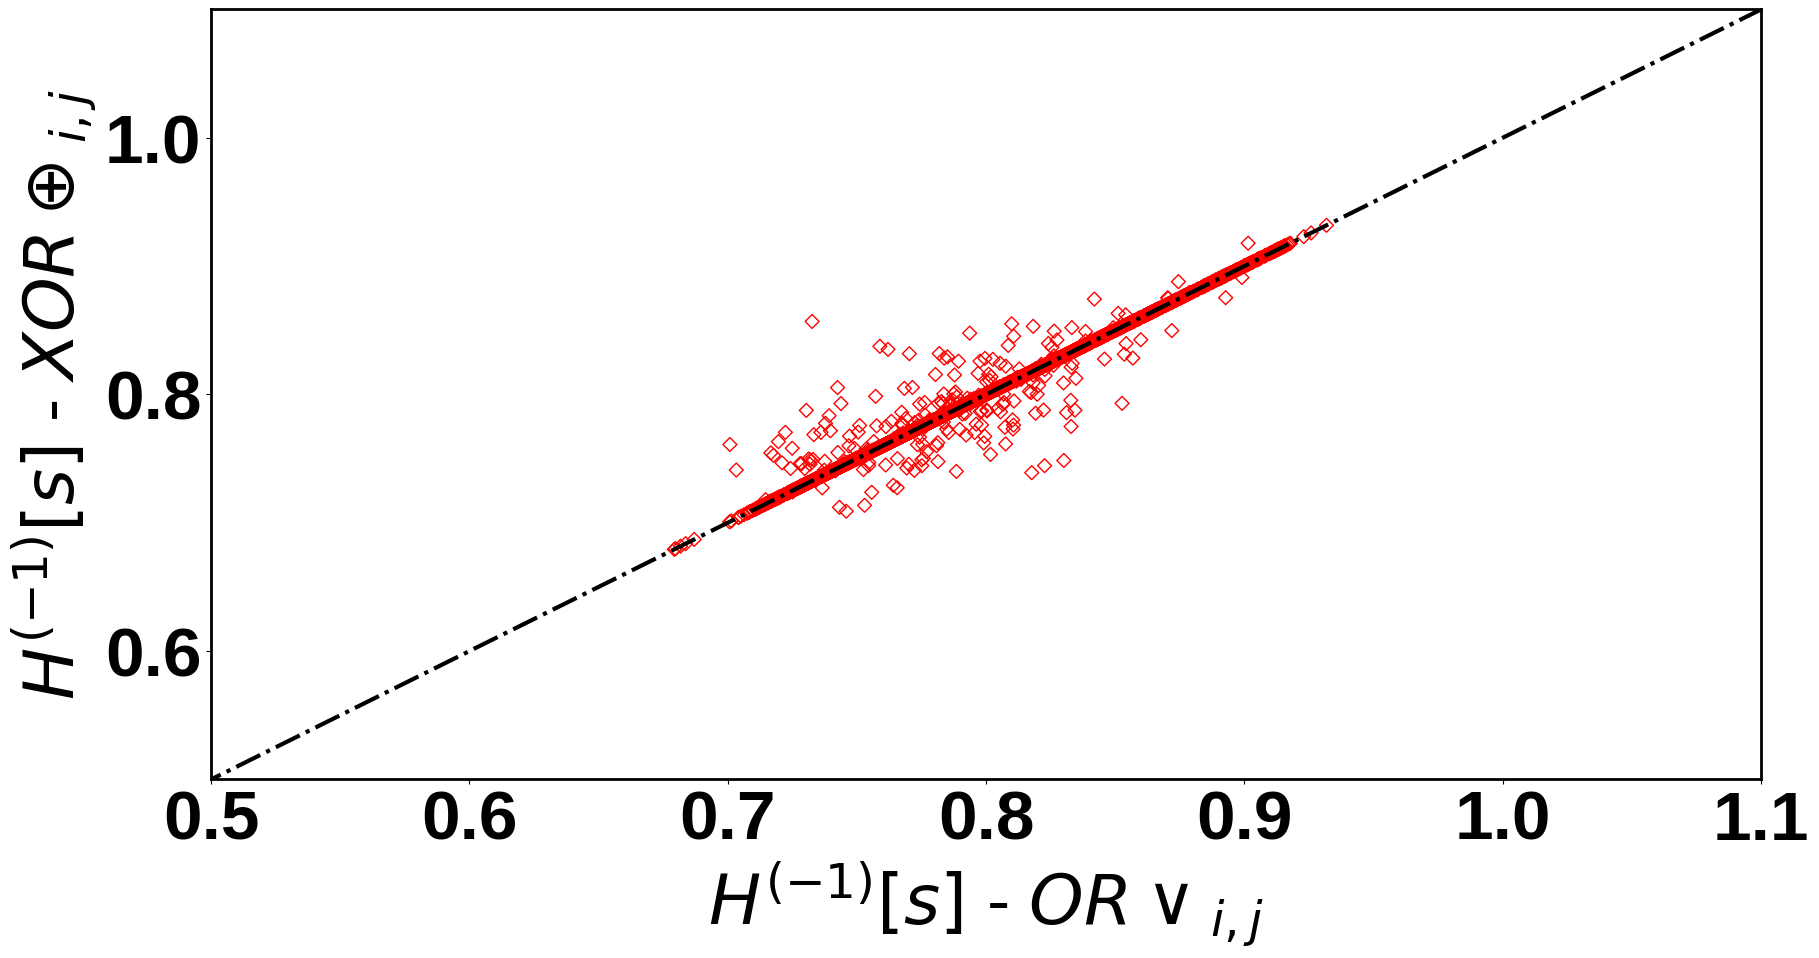

In [135]:
fig, ax1 = plt.subplots(figsize=(20,10))
figname='../figures/CA1_OHS_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="CA1"')[quant].values,df_XOR.query('U_LOC=="CA1"')[quant].values, label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[s]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[s]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

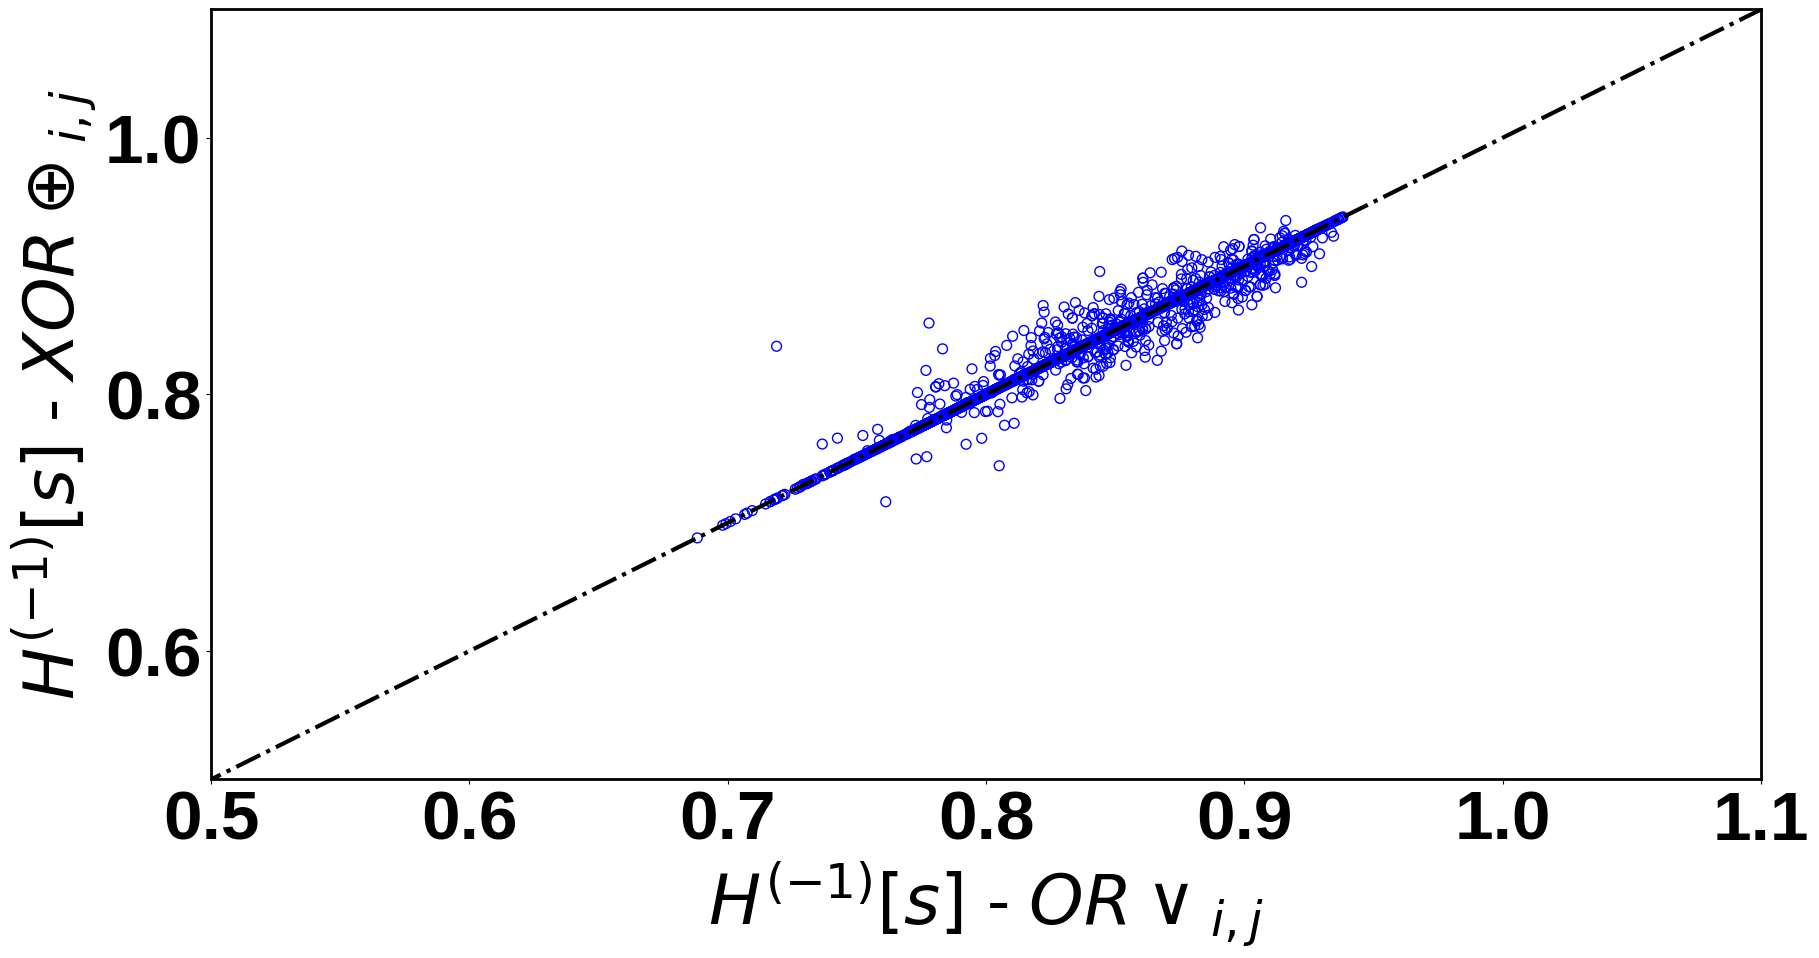

In [136]:
fig, ax1 = plt.subplots(figsize=(20,10))
figname='../figures/SUB_OHS_ORvXOR.pdf'

ax1.scatter(df_OR.query('U_LOC=="SUB"')[quant].values,df_XOR.query('U_LOC=="SUB"')[quant].values,
         label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax1.set_xlabel(r'$H^{(-1)}[s]$ - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[s]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

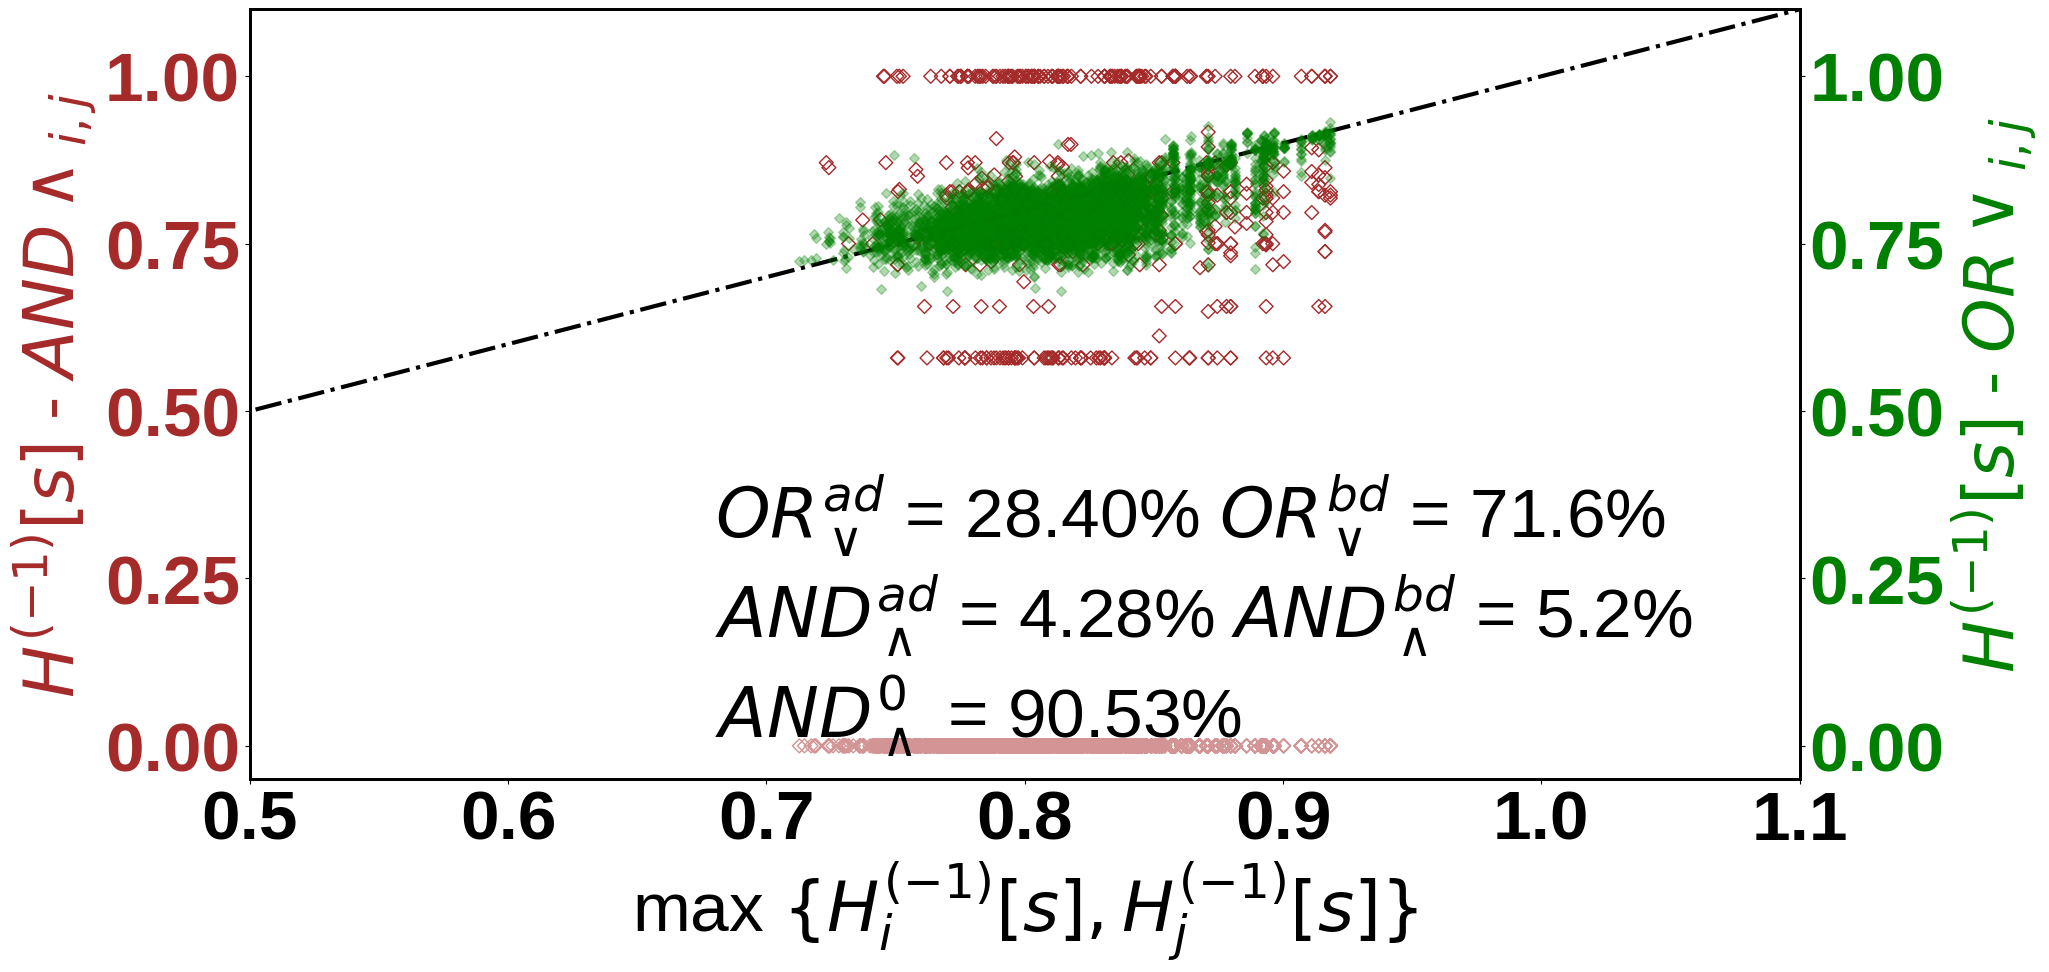

In [137]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/CA1_OHS_maxMvANDOR.pdf'


ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax.set_xlabel(r'max $\{ H^{(-1)}_i[s] , H^{(-1)}_j[s] \}$');


ax.scatter(list_of_AND.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1"')[quant].values,
         label='ANDed CA1 Neurons', marker='D',facecolors='none',edgecolors=clr,s=mss )
ax.set_ylabel(r'$H^{(-1)}[s]$ - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'



for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax_twin.scatter(list_of_OR.query('loc=="CA1"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1"')[quant].values,
         label='ORed CA1 Neurons', marker='D',color=clr,s=mss/2,alpha=0.3)
ax_twin.set_ylabel(r'$H^{(-1)}[s]$ - $OR\vee_{i,j}$');       
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="CA1" and OHS>R_OHS_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="CA1" and OHS<R_OHS_MAX').shape[0]/list_of_OR.query('loc=="CA1"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="CA1" and 0<OHS<R_OHS_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="CA1" and OHS>R_OHS_MAX').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]
fracC_zero=list_of_AND.query('loc=="CA1" and OHS==0').shape[0]/list_of_AND.query('loc=="CA1"').shape[0]


ax.text(0.3, 0.4,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
        r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

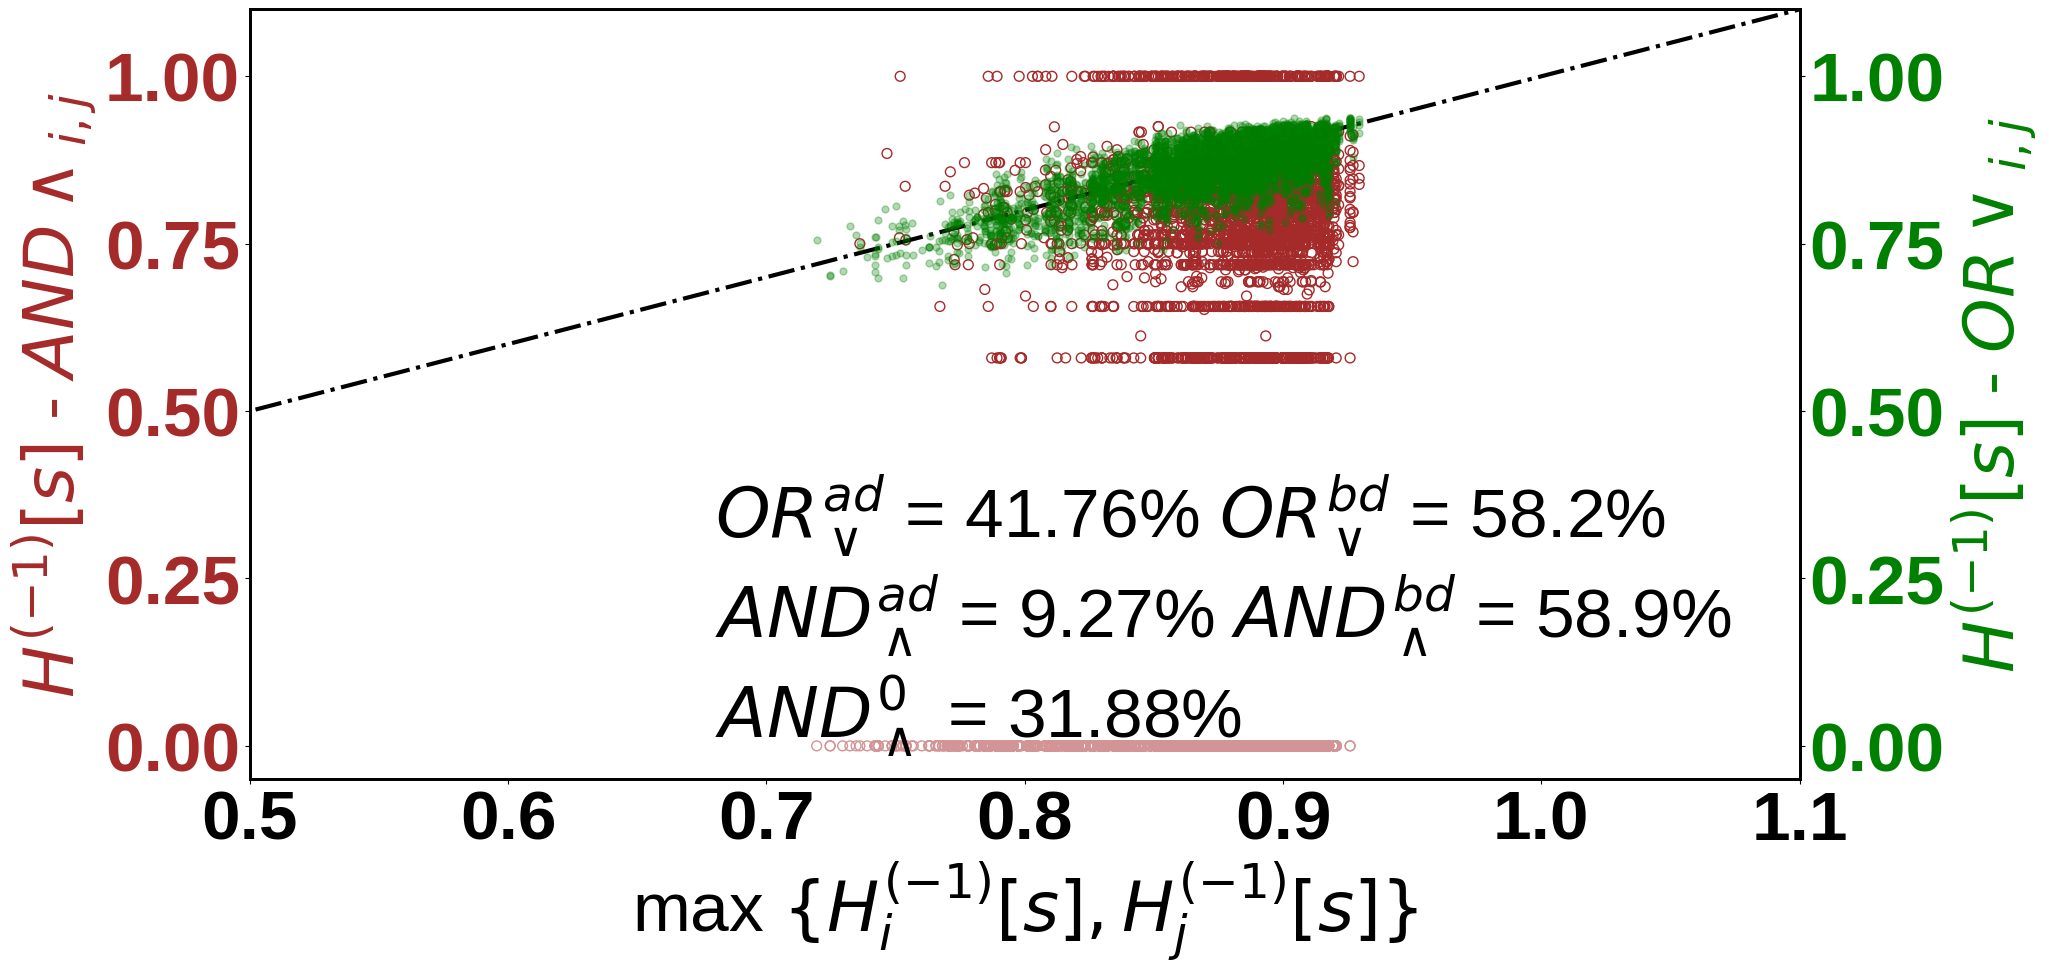

In [138]:
fig, ax = plt.subplots(figsize=(20,10))
figname='../figures/SUB_OHS_maxMvANDOR.pdf'

ax.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='brown'
ax.set_xlim([qmin,qmax]);ax.set_ylim([yqmin,yqmax]);
for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax.set_xlabel(r'max $\{ H^{(-1)}_i[s] , H^{(-1)}_j[s] \}$');


ax.scatter(list_of_AND.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB"')[quant].values,
         label='ANDed SUB Neurons', marker='o',facecolors='none',edgecolors=clr,s=mss)
ax.set_ylabel(r'$H^{(-1)}[s]$ - $AND\wedge_{i,j}$');
ax.tick_params(axis='y',labelcolor=clr)
ax.yaxis.label.set_color(clr)


ax_twin = ax.twinx()
clr='green'

for tick in ax_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax_twin.scatter(list_of_OR.query('loc=="SUB"')["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB"')[quant].values,
         label='ORed SUB Neurons', marker='o',color=clr,s=mss/2 ,alpha=0.3)
ax_twin.set_ylabel(r'$H^{(-1)}[s]$ - $OR\vee_{i,j}$');
ax_twin.tick_params(axis='y', labelcolor=clr)
ax_twin.yaxis.label.set_color(clr)
ax_twin.set_ylim([yqmin,yqmax]);

## Activate if plotting for all recording 
fracC_ad_or=list_of_OR.query('loc=="SUB" and OHS>R_OHS_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]
fracC_bd_or=list_of_OR.query('loc=="SUB" and OHS<R_OHS_MAX').shape[0]/list_of_OR.query('loc=="SUB"').shape[0]

fracC_bd_and=list_of_AND.query('loc=="SUB" and 0<OHS<R_OHS_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_ad_and=list_of_AND.query('loc=="SUB" and OHS>R_OHS_MAX').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]
fracC_zero=list_of_AND.query('loc=="SUB" and OHS==0').shape[0]/list_of_AND.query('loc=="SUB"').shape[0]


ax.text(0.3, 0.4,   
        r'$OR^{ad}_\vee$ = %.2f%%' % (100*fracC_ad_or)+' '+r'$OR^{bd}_\vee$ = %.1f%%' %(100*fracC_bd_or)+'\n'+
        r'$AND^{ad}_\wedge$ = %.2f%%'% (100*fracC_ad_and)+' '+r'$AND^{bd}_\wedge$ = %.1f%%'%(100*fracC_bd_and)+'\n'+
        r'$AND^0_\wedge$ = %.2f%%'% (100*fracC_zero),
         transform=ax.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))

fig.savefig(figname,bbox_inches='tight',dpi=300)
plt.show()

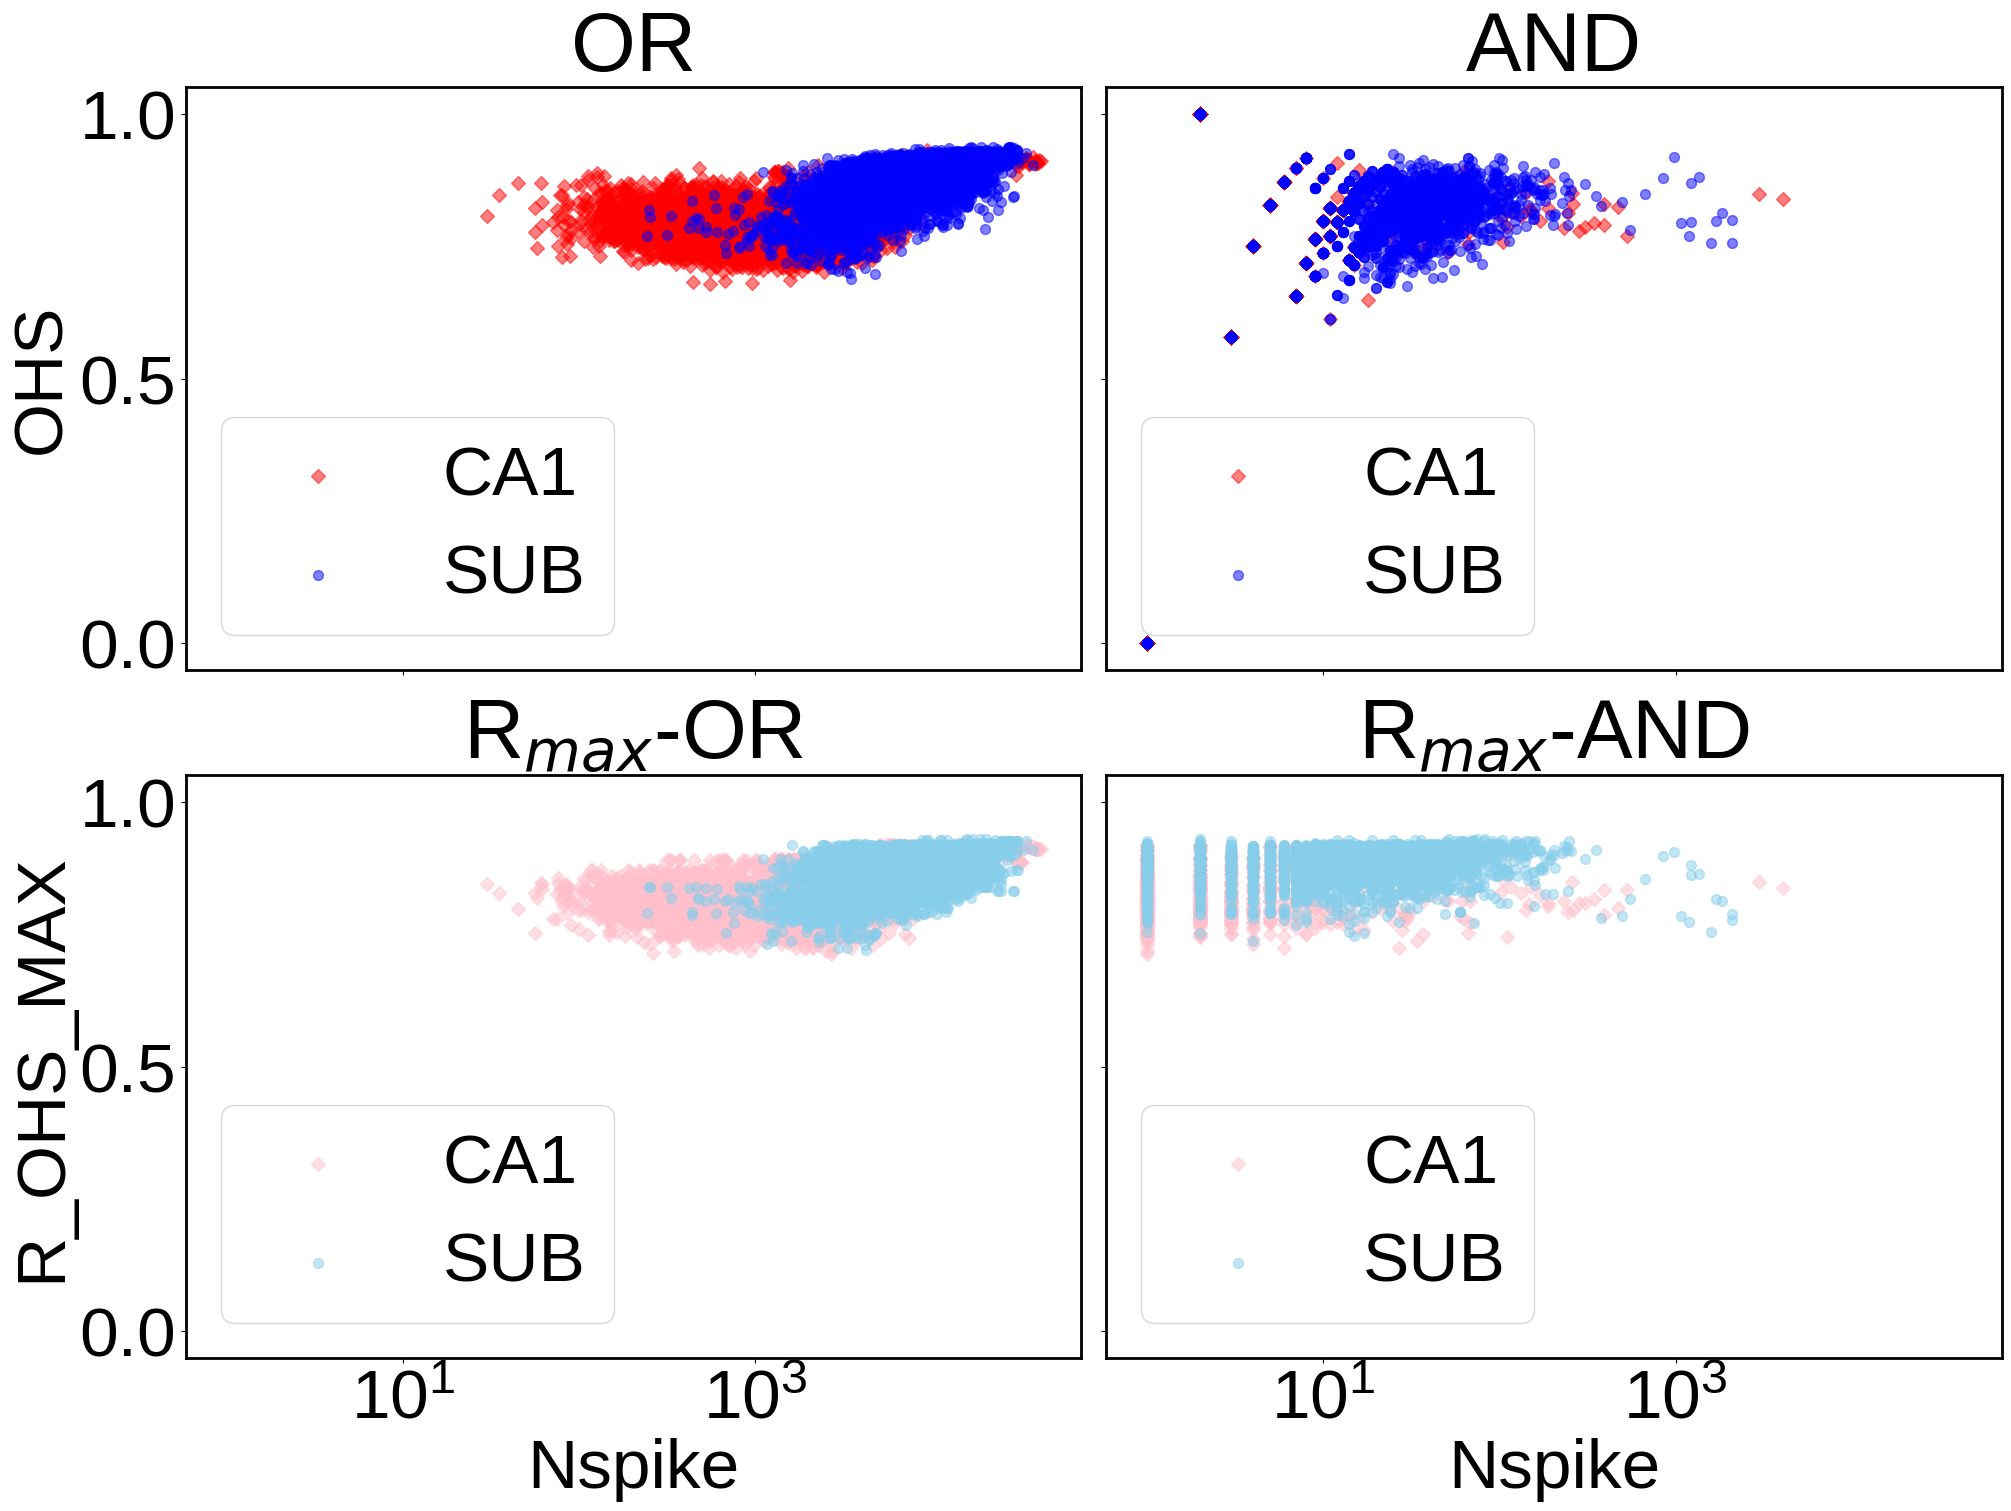

In [139]:
figname='../figures/OHS_LoPvNspike.pdf'

f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True,sharey=True,figsize=(20,15),constrained_layout=True) 

list_of_OR.query('loc=="CA1"').plot(y='OHS',x='Nspike',kind='scatter',ax=ax1,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='OHS',x='Nspike',kind='scatter',ax=ax1,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax1.set_xscale('log')
ax1.set_title('OR')

list_of_OR.query('loc=="CA1"').plot(y='R_OHS_MAX',x='Nspike',kind='scatter',ax=ax3,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_OR.query('loc=="SUB"').plot(y='R_OHS_MAX',x='Nspike',kind='scatter',ax=ax3,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax3.set_xscale('log')
ax3.set_title(r'R$_{max}$-OR')


list_of_AND.query('loc=="CA1"').plot(y='OHS',x='Nspike',kind='scatter',ax=ax2,color='r',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='OHS',x='Nspike',kind='scatter',ax=ax2,color='b',label='SUB',marker='o',s=mss,alpha=0.5)
ax2.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax2.set_title('AND')

list_of_AND.query('loc=="CA1"').plot(y='R_OHS_MAX',x='Nspike',kind='scatter',ax=ax4,color='pink',label='CA1',marker='D',s=mss,alpha=0.5)
list_of_AND.query('loc=="SUB"').plot(y='R_OHS_MAX',x='Nspike',kind='scatter',ax=ax4,color='skyblue',label='SUB',marker='o',s=mss,alpha=0.5)
ax4.set_xscale('log')
# ax2.set_xlim([0.24,0.31])
ax4.set_title(r'R$_{max}$-AND')

fig.savefig(figname,bbox_inches='tight',dpi=300)

plt.show()

## Code for Plots not included in the Manuscript -- not updated

In [140]:
# # Activate for Single recording plots
# rats=[20382,24101,21012,22295,20630,22098,23783,24116]
# path="../data_bool/"
 
# rat=21012
# df=pd.read_json(path+"Rat_"+str(rat)+"_BOOLop_resrel_data.json")
# df = df.fillna(0)
# #rec_gids=df.Rec_GID.unique()

# rgid=3378

Plotting for Single Recordings for all Rats

In [141]:
quant='MSR'

#For MSR
qmin=0.245;qmax=0.31; #For MSR

# #MSR
# xqmax=0.31;xqmin=0.25;
yqmax=0.32;yqmin=-0.02;

#####################################################################
# qmin=0.245;qmax=0.305; mss=30 #For MSR
# #qmin=0.1;qmax=0.5; mss=30 #For OHK

# #MSR
# xqmax=0.31;xqmin=0.25;
# yqmax=0.32;yqmin=-0.02;

# #OHK
# # xqmax=0.6;xqmin=0.1;
# # yqmax=0.6;yqmin=0.1;



In [142]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

In [143]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='col',sharey='col',figsize=(50,30))

ax1.scatter(df_OR.query('U_LOC=="CA1" and Rec_GID =='+str(rgid))[quant].values,df_XOR.query('U_LOC=="CA1" and Rec_GID =='+str(rgid))[quant].values,label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

# ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)

   
ax3.scatter(df_OR.query('U_LOC=="SUB" and Rec_GID =='+str(rgid))[quant].values,df_XOR.query('U_LOC=="SUB" and Rec_GID =='+str(rgid))[quant].values,label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax3.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax3.set_xlim([qmin,qmax]);ax3.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)

ax3.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax3.set_ylabel(quant+r' - $XOR\oplus_{i,j}$');

for tick in ax3.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax3.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
    
ax2.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='coral'
ax2.set_xlim([qmin,qmax]);ax2.set_ylim([yqmin,yqmax]);

for tick in ax2.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax2.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    

ax2.set_ylabel(quant+r' - $OR\vee_{i,j}$');

ax2.scatter(list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid))[quant].values,
         label='ANDed CA1 Neurons', marker='D', color=clr,s=mss/2)
ax2.tick_params(axis='y',labelcolor=clr)
ax2.yaxis.label.set_color(clr)


ax2_twin = ax2.twinx()
clr='green'
ax2_twin.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
for tick in ax2_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax2_twin.scatter(list_of_OR.query('loc=="CA1" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1" and Rec_GID =='+str(rgid))[quant].values,
         label='ORed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)
ax2_twin.tick_params(axis='y', labelcolor=clr)
ax2_twin.yaxis.label.set_color(clr)
ax2_twin.set_ylim([yqmin,yqmax]);


# Activate if plotting for single recording of a rat
fracC=np.round(divs(list_of_AND.query('loc=="CA1" and MSR>R_MSR_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid)).shape[0]),2)


ax2.text(0.7, 0.15,   r'$CA1_\wedge = %.2f$' % (fracC[0]),
         transform=ax2.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))


ax4.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='coral'
ax4.set_xlim([qmin,qmax]);ax4.set_ylim([yqmin,yqmax]);
for tick in ax4.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax4.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
ax4.set_xlabel(r'max $\{'+quant+r'_i,'+quant+r'_j\}$');
ax4.set_ylabel(quant+r' - $OR\vee_{i,j}$');

ax4.scatter(list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid))[quant].values,
         label='ANDed SUB Neurons', marker='o', color=clr,s=mss/2)
ax4.tick_params(axis='y',labelcolor=clr)
ax4.yaxis.label.set_color(clr)


ax4_twin = ax4.twinx()
clr='green'
ax4_twin.set_ylabel(quant+r' - $AND\wedge_{i,j}$');
for tick in ax4_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax4_twin.scatter(list_of_OR.query('loc=="SUB" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB" and Rec_GID =='+str(rgid))[quant].values,
         label='ORed SUB Neurons', marker='o', facecolors='none',edgecolors=clr,s=mss)
ax4_twin.tick_params(axis='y', labelcolor=clr)
ax4_twin.yaxis.label.set_color(clr)
ax4_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for single recording of a rat
fracS=np.round(divs(list_of_AND.query('loc=="SUB" and MSR>R_MSR_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid)).shape[0]),2)

ax4.text(0.7, 0.15,   r'$SUB_\wedge = %.2f$' % (fracS[0]),
         transform=ax4.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))


handles, labels = [], []
for ax in [ax1,ax2, ax2_twin,ax3,ax4,ax4_twin]:  # Add the axes that contain the plots you want in the legend
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

# Create a single legend for the whole figure
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.6, 0.98), ncol=3,fontsize=fontssize)

fig.suptitle("Rat "+str(rat)+" Rec GID "+str(rgid), x=0.1, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 1.2*fontssize,color='red')
fig.subplots_adjust(wspace=0.15,hspace=0.06)

# directory="../../"
# fig.savefig(directory+"Rat_"+str(rat)+"Rec_"+str(rgid)+".png",bbox_inches='tight',dpi=300)
plt.show()

NameError: name 'rgid' is not defined

In [ ]:
quant='OHK'

##For OHK
qmin=0.1;qmax=0.6; 

##OHK
#xqmax=0.6;xqmin=0.1;
# yqmax=0.6;yqmin=0.1;


# #MSR
# xqmax=0.31;xqmin=0.25;
yqmax=0.32;yqmin=-0.02;

# #OHK
# # xqmax=0.6;xqmin=0.1;
yqmax=0.6;yqmin=0.1;

In [ ]:
quant_OR_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_OR.U1_GID.values,df_OR.U2_GID.values)))}
quant_AND_vals={unit : df.query('U1_GID=='+str(unit)+' and OP=="NA"')[quant].values[0] for unit in np.unique(np.hstack((df_AND.U1_GID.values,df_AND.U2_GID.values)))}

OR_list=[]
for (a,b) in df_OR[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_OR_vals[b.values[1]],
            'U2_'+quant:quant_OR_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_OR_vals[b.values[1]],quant_OR_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    OR_list.append(row)
list_of_OR=pd.DataFrame(OR_list)

AND_list=[]
for (a,b) in df_AND[[quant,"U1_GID","U2_GID","Nspikes","U_LOC","Rec_GID"]].iterrows():
    row={quant:b.values[0],
            'U1_GID':b.values[1],
            'U2_GID':b.values[2],
            'U1_'+quant:quant_AND_vals[b.values[1]],
            'U2_'+quant:quant_AND_vals[b.values[2]],
            'R_'+quant+'_MAX':np.max([quant_AND_vals[b.values[1]],quant_AND_vals[b.values[2]]]),
            'Nspike':b.values[3],
            'loc':b.values[4],
            'Rec_GID':b.values[5]
          };
    AND_list.append(row)
list_of_AND=pd.DataFrame(AND_list)
#list_of_AND[quant] = list_of_AND[quant].replace(0, np.nan)

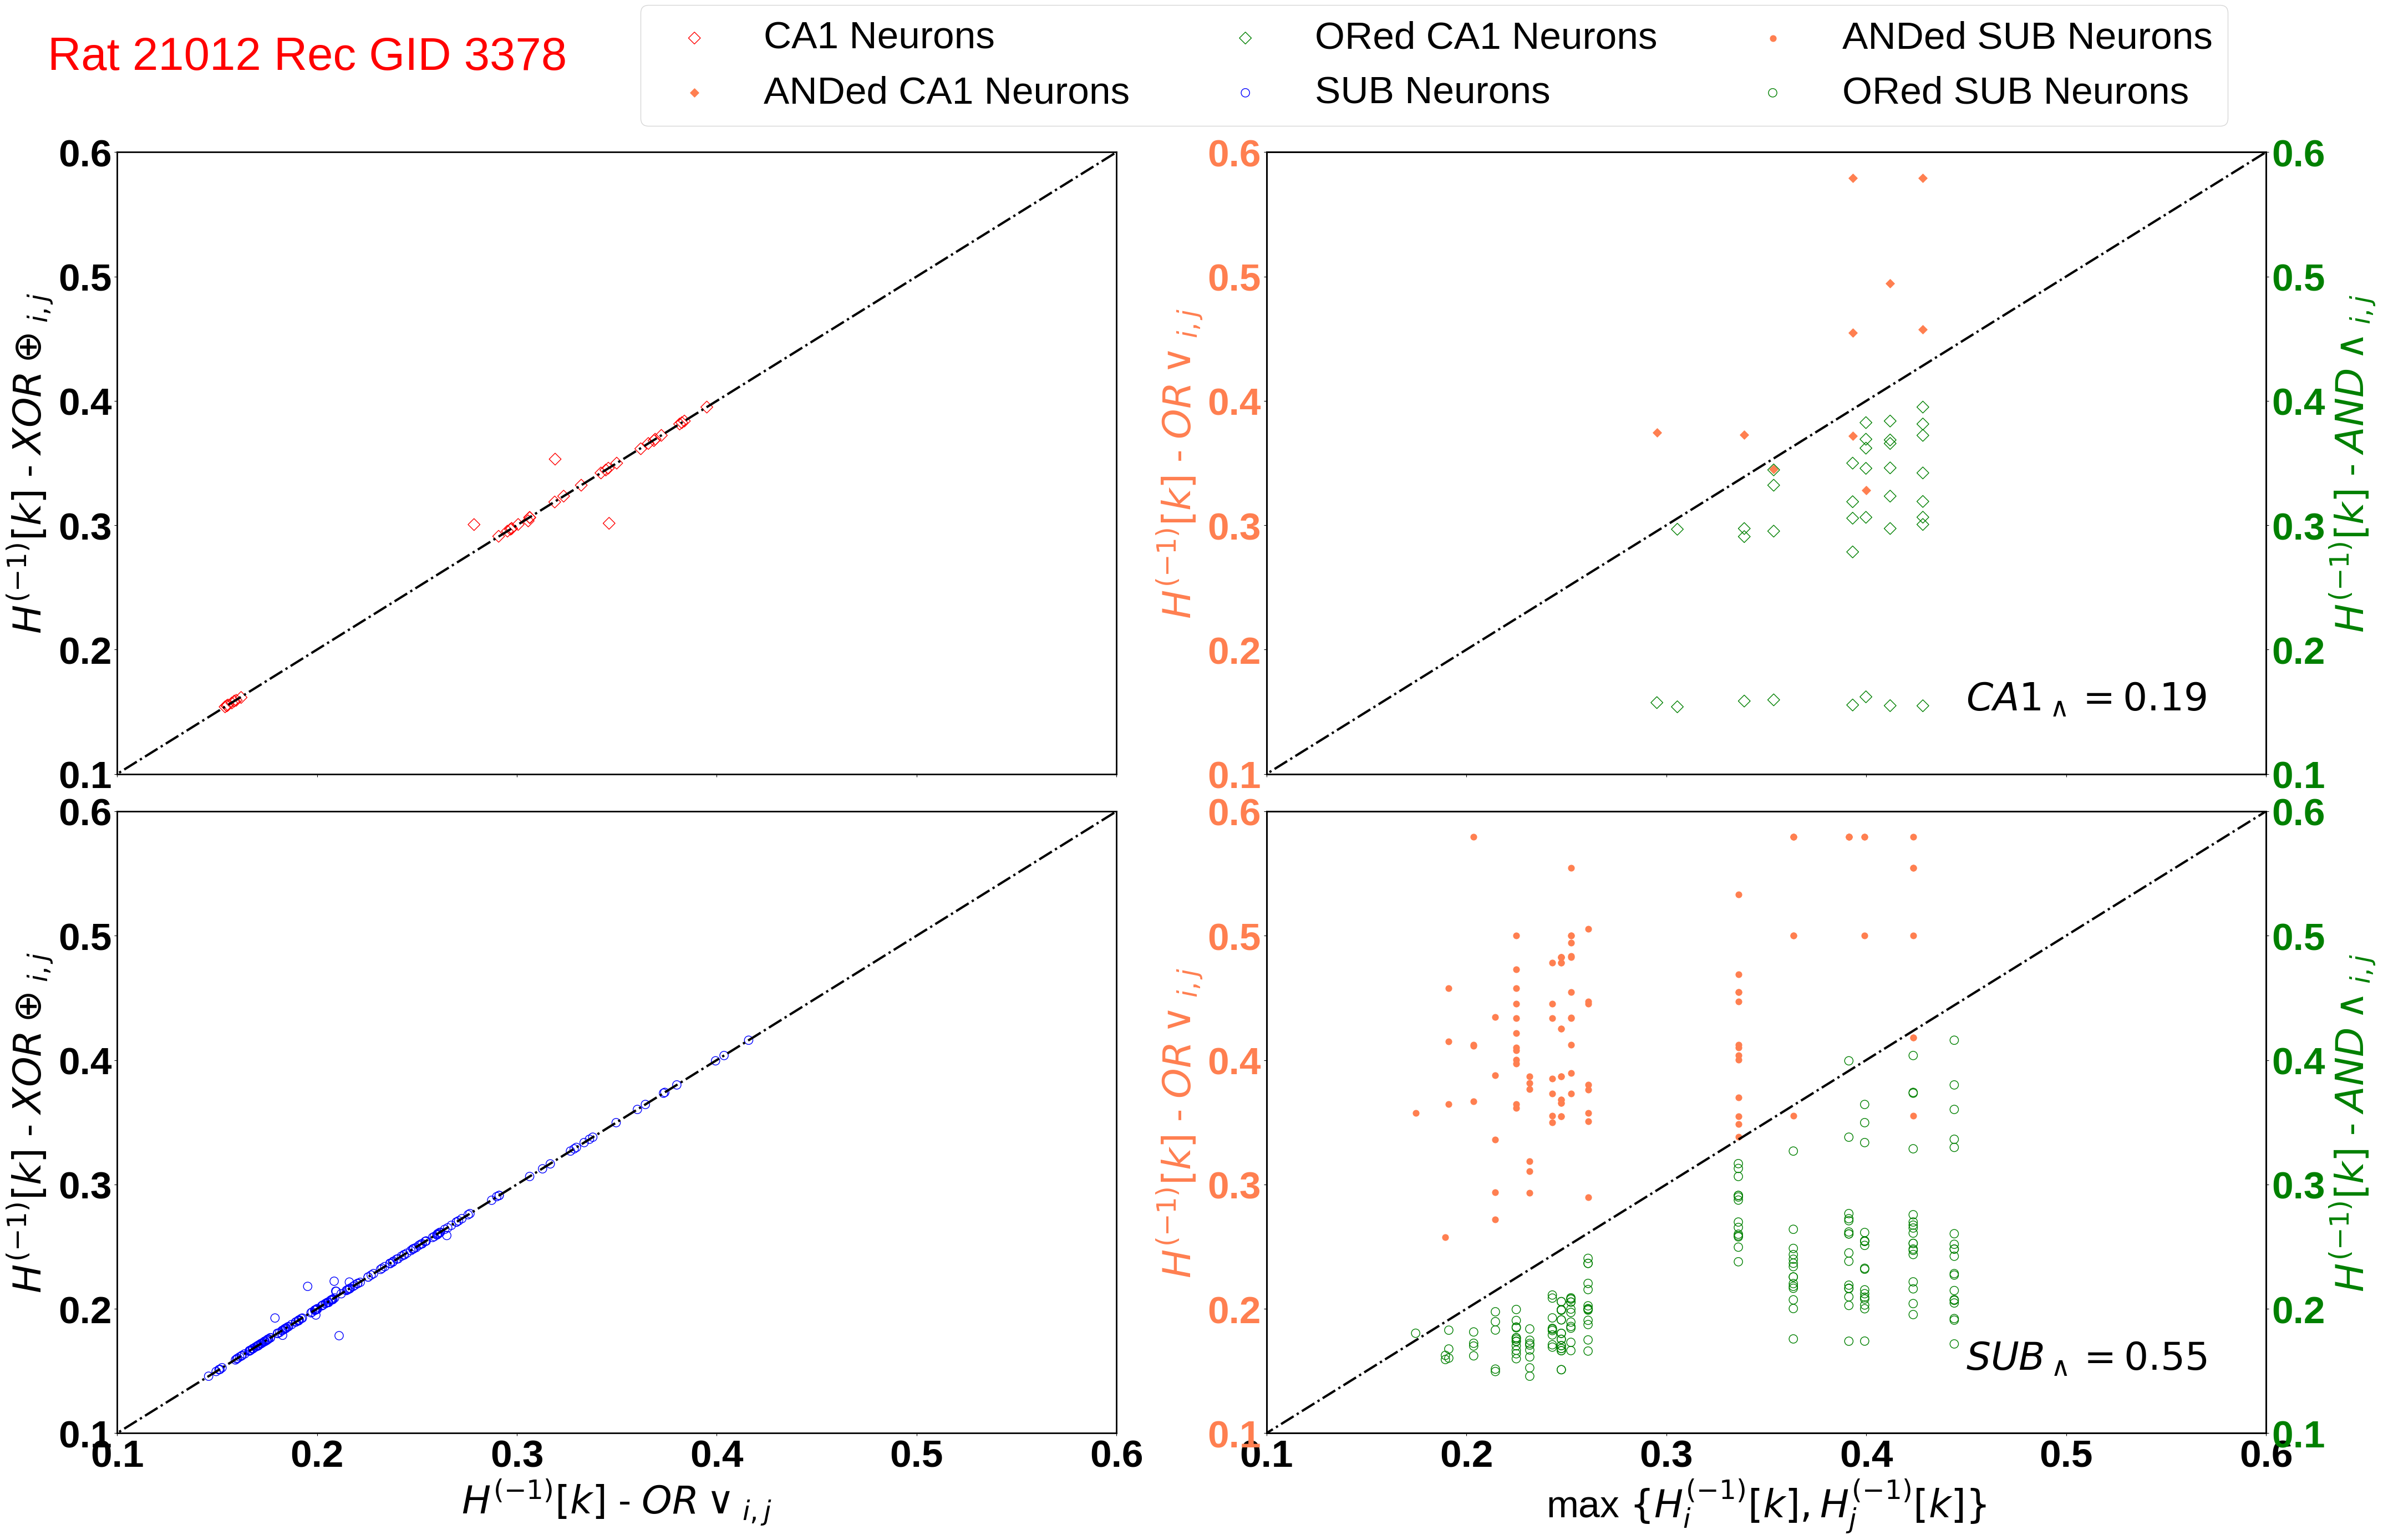

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='col',sharey='col',figsize=(50,30))

ax1.scatter(df_OR.query('U_LOC=="CA1" and Rec_GID =='+str(rgid))[quant].values,df_XOR.query('U_LOC=="CA1" and Rec_GID =='+str(rgid))[quant].values,label='CA1 Neurons', marker='D', facecolors='none',edgecolors='r',s=mss)

ax1.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line

ax1.set_xlim([qmin,qmax]);ax1.set_ylim([qmin,qmax])
# ax1.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=False,labelleft=True,rotation=0)

# ax1.set_xlabel(quant+r' - $OR\vee_{i,j}$');
ax1.set_ylabel(r'$H^{(-1)}[k]$ - $XOR\oplus_{i,j}$');

for tick in ax1.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax1.get_yticklabels():
    tick.set_fontproperties(ticks_font)

   
ax3.scatter(df_OR.query('U_LOC=="SUB" and Rec_GID =='+str(rgid))[quant].values,df_XOR.query('U_LOC=="SUB" and Rec_GID =='+str(rgid))[quant].values,label='SUB Neurons', marker='o', facecolors='none',edgecolors='b',s=mss)

ax3.plot([0, qmax], [0, qmax],color="k",ls="-.", lw=3) ## Diagonal Line
ax3.set_xlim([qmin,qmax]);ax3.set_ylim([qmin,qmax])

# ax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True,labelleft=True,rotation=0)


ax3.set_xlabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');
ax3.set_ylabel(r'$H^{(-1)}[k]$ - $XOR\oplus_{i,j}$');


for tick in ax3.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax3.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    
    
ax2.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='coral'
ax2.set_xlim([qmin,qmax]);ax2.set_ylim([yqmin,yqmax]);

for tick in ax2.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax2.get_yticklabels():
    tick.set_fontproperties(ticks_font)
    

ax2.set_ylabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');

ax2.scatter(list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid))[quant].values,
         label='ANDed CA1 Neurons', marker='D', color=clr,s=mss/2)
ax2.tick_params(axis='y',labelcolor=clr)
ax2.yaxis.label.set_color(clr)


ax2_twin = ax2.twinx()
clr='green'
ax2_twin.set_ylabel(r'$H^{(-1)}[k]$ - $AND\wedge_{i,j}$');
for tick in ax2_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax2_twin.scatter(list_of_OR.query('loc=="CA1" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="CA1" and Rec_GID =='+str(rgid))[quant].values,
         label='ORed CA1 Neurons', marker='D', facecolors='none',edgecolors=clr,s=mss)
ax2_twin.tick_params(axis='y', labelcolor=clr)
ax2_twin.yaxis.label.set_color(clr)
ax2_twin.set_ylim([yqmin,yqmax]);


# Activate if plotting for single recording of a rat
fracC=np.round(divs(list_of_AND.query('loc=="CA1" and OHK>R_OHK_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="CA1" and Rec_GID =='+str(rgid)).shape[0]),2)


ax2.text(0.7, 0.15,   r'$CA1_\wedge = %.2f$' % (fracC[0]),
         transform=ax2.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))


ax4.plot([0, yqmax], [0, yqmax],color="k",ls="-.", lw=3) ## Diagonal Line#

clr='coral'
ax4.set_xlim([qmin,qmax]);ax4.set_ylim([yqmin,yqmax]);
for tick in ax4.get_xticklabels():
    tick.set_fontproperties(ticks_font)
for tick in ax4.get_yticklabels():
    tick.set_fontproperties(ticks_font)

ax4.set_xlabel(r'max $\{ H^{(-1)}_i[k] , H^{(-1)}_j[k] \}$');
ax4.set_ylabel(r'$H^{(-1)}[k]$ - $OR\vee_{i,j}$');


ax4.scatter(list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid))[quant].values,
         label='ANDed SUB Neurons', marker='o', color=clr,s=mss/2)
ax4.tick_params(axis='y',labelcolor=clr)
ax4.yaxis.label.set_color(clr)


ax4_twin = ax4.twinx()
clr='green'
ax4_twin.set_ylabel(r'$H^{(-1)}[k]$ - $AND\wedge_{i,j}$');
for tick in ax4_twin.get_yticklabels():
    tick.set_fontproperties(ticks_font)
ax4_twin.scatter(list_of_OR.query('loc=="SUB" and Rec_GID =='+str(rgid))["R_"+quant+"_MAX"].values,list_of_OR.query('loc=="SUB" and Rec_GID =='+str(rgid))[quant].values,
         label='ORed SUB Neurons', marker='o', facecolors='none',edgecolors=clr,s=mss)
ax4_twin.tick_params(axis='y', labelcolor=clr)
ax4_twin.yaxis.label.set_color(clr)
ax4_twin.set_ylim([yqmin,yqmax]);


## Activate if plotting for single recording of a rat
fracS=np.round(divs(list_of_AND.query('loc=="SUB" and OHK>R_OHK_MAX and Rec_GID =='+str(rgid)).shape[0],list_of_AND.query('loc=="SUB" and Rec_GID =='+str(rgid)).shape[0]),2)

ax4.text(0.7, 0.15,   r'$SUB_\wedge = %.2f$' % (fracS[0]),
         transform=ax4.transAxes, fontsize=fontssize, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, linewidth=0))


handles, labels = [], []
for ax in [ax1,ax2, ax2_twin,ax3,ax4,ax4_twin]:  # Add the axes that contain the plots you want in the legend
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

# Create a single legend for the whole figure
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.6, 0.98), ncol=3,fontsize=fontssize)

fig.suptitle("Rat "+str(rat)+" Rec GID "+str(rgid), x=0.1, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 1.2*fontssize,color='red')
fig.subplots_adjust(wspace=0.15,hspace=0.06)

# directory="../../"
# fig.savefig(directory+"Rat_"+str(rat)+"Rec_"+str(rgid)+".png",bbox_inches='tight',dpi=300)
plt.show()